<font color='red'>                      **CV, ML, CNN, & DNN Compiled: By Alem Fitwi(PhD STudent @SUNY), From August 2017 to Date**</font>

## <div class="alert alert-info"> Packages

- !pip install pkg_name

In [3]:
# Standard/Built-in Modules
#---------------------------------------------------
import os
import re
import gc
import sys
import math
import warnings
from time import perf_counter as pc
warnings.filterwarnings('ignore')
from concurrent.futures import ThreadPoolExecutor as tpe
from concurrent.futures import ProcessPoolExecutor as ppe

# Third-party Modules
#---------------------------------------------------
# DIP
import cv2
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from IPython.display import Image as dimg
from scipy.fftpack import dct, idct # dct(x, type=2)
from skimage.measure import block_reduce
from scipy.ndimage import map_coordinates
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu

# Data
import pandas as pd
from glob import glob

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib.pyplot import figure, imshow, axis


# User Defined
#---------------------------------------------------


# Global Vars
#---------------------------------------------------


## <div class="alert alert-danger"> Quick Plotting Functions

In [6]:
def showimg(img, title='', color=None, sp=False, cmap='gray', sq=False):
    plt.imshow(img, cmap=cmap)

    if title:
        plt.title(title + ', Shape = ' + str(img.shape))
    else:
        plt.title('Shape = ' + str(img.shape))
    if not isinstance(sp, bool):
        plt.savefig(sp, 
                    dpi=300,
                    papertype='ledger',
                    formt='.png',
                    facecolor=color,
                    edgecolor='black',
                    orientation='landscape',
                    bbox_inches='tight',
                    pad_inches=0,
                    transparent=False,
                    frameon=None, 
                    metadata=None                   
                    
                   )
    if sq:
        plt.close('all')
    else:
        plt.show()


def showImgsHorizontally(img_list):
    fig = figure()
    number_of_files = len(img_list)
    for i in range(number_of_files):
        a=fig.add_subplot(1, number_of_files, i+1)
        image = img_list[i]
        imshow(image, cmap='Greys_r')
        axis('off')

    return True   

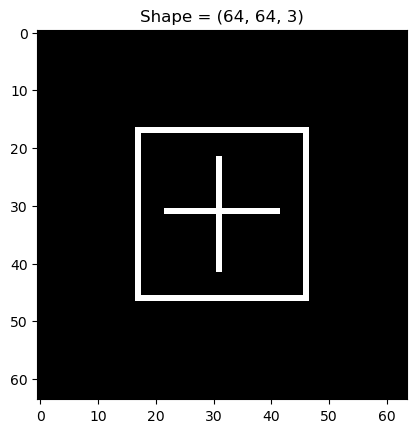

In [8]:
def create_img(H=64, W=64):
    img = np.zeros((H, H, 3), np.uint8)
    xc, yc = 32, 32
    img[yc-10:yc+10, xc-1:xc]=255
    img[yc-1:yc, xc-10:xc+10]=255
    
    img[yc-15:yc-14, xc-15:xc+15]=255
    img[yc+14:yc+15, xc-15:xc+15]=255
    img[yc-15:yc+15, xc-15:xc-14]=255
    img[yc-15:yc+15, xc+14:xc+15]=255
    cv2.imwrite('name.png', img)

    return img

img = create_img()
img1 = img.copy()
showimg(img)

True

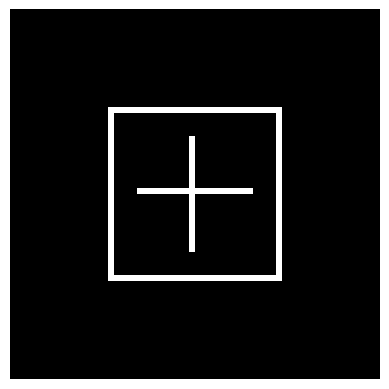

In [167]:
showImgsHorizontally([img])

## <div class="alert alert-warning"> I/O

In [209]:
# Loads image as BGR (if grayscale, B=G=R)
img = cv2.imread("name.png") 
img = cv2.imread("name.png", 1) 

# Loads image as is (inc. transparency if available)
img = cv2.imread("name.png", cv2.IMREAD_UNCHANGED) 
img = cv2.imread("name.png", -1) # tiff, bmp, jpg, png as-is

# Loads image as grayscale
img = cv2.imread("name.png", cv2.IMREAD_GRAYSCALE) 
img = cv2.imread("name.png", 0) 

# Saves image Image
cv2.imwrite('name.png', img)

True

## <div class="alert alert-success"> Color/Intensity/Channels

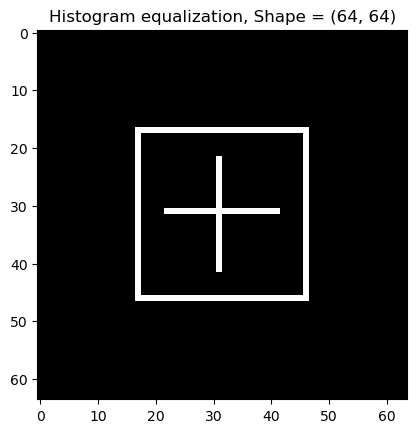

In [176]:
# BGR to gray conversion
img_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY) 

# BGR to RGB (useful for matplotlib)
img_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) 

# Converts grayscale to RGB (R=G=B)
gs2rgb = cv2.cvtColor(img_gray, cv2.COLOR_GRAY2RGB) 

# Histogram equalization
he = cv2.equalizeHist(img_gray)
showimg(he, title='Histogram equalization')

- Other useful color spaces
    - COLOR_BGR2HSV #BGR to HSV (Hue, Saturation, Value)
    - COLOR_HSV2BGR #HSV to BGR 
    - COLOR_BGR2LAB #BGR to Lab (Lightness, Green/Magenta, Blue/Yellow)
    - COLOR_LAB2BGR
    - COLOR_BGR2LUV #BGR to Luv (≈ Lab, but different normalization)
    - COLOR_BGR2YCrCb #BGR to YCrCb (Luma, Blue-Luma, Red-Luma)

In [197]:
img11 = np.zeros(img1.shape[:2]+(4,))
img11[:, :, 3]= img1[:,:,0]
img11.shape

(64, 64, 4)

In [199]:
# Channel manipulation
b, g, r = cv2.split(img1) #Splits the image Img into channels
b, g, r, a = cv2.split(img11) # Same as above, but Img has alpha channel
bgr = cv2.merge((b, g, r)) #Merges channels into image

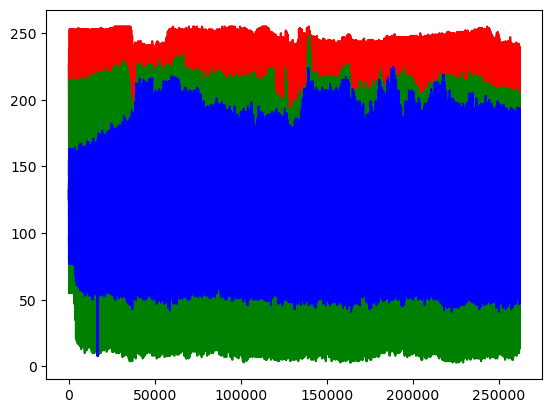

In [204]:
lenna = cv2.imread('Lenna.png',1)
b, g, r = cv2.split(lenna)
plt.plot(r.flatten(), color='red')
plt.plot(g.flatten(), color='green')
plt.plot(b.flatten(), color='blue')
plt.show()

## <div class="alert alert-warning"> Normalization

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


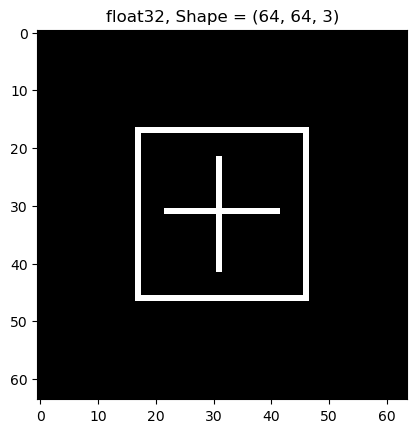

In [215]:
imgf = img1.copy().astype('float32')
showimg(imgf, title=str(imgf.dtype))

In [223]:
# Normalizes Img between 0 and 255, cv2.CV_8UC1) or cv2.CV_8U
nimg8 = cv2.normalize(imgf.astype('float32'), None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1) 
nimg8.shape, nimg8.dtype

((64, 64, 3), dtype('uint8'))

In [227]:
# Normalizes Img between 0 and 1, cv2.CV_32F
nimgf32 = cv2.normalize(imgf.astype('float32'), None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F) 
nimgf32.shape, nimgf32.dtype

((64, 64, 3), dtype('float32'))

In [237]:
#  Normalizes Img Log Scale
log_nimg = cv2.normalize(255 / np.log(1 + np.max(imgf.astype(np.float32)+1)
                                      ) * np.log(imgf.astype(np.float32)+1),
                         None, alpha=0, beta=255,
                         norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

log_nimg.max(), log_nimg.mean()

(255, 9.649658203125)

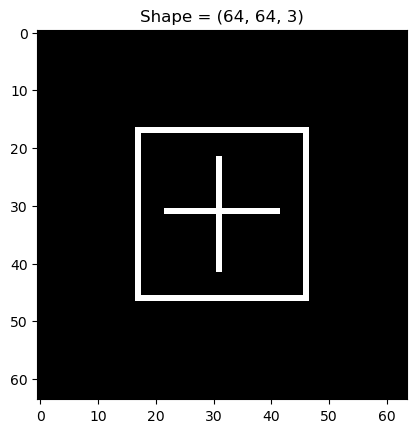

In [241]:
showimg(log_nimg) 

In [243]:
# np.array(img, np.uint8)
arr = np.array([[300, 513],[157, 729]])
arr

array([[300, 513],
       [157, 729]])

In [245]:
np.array(arr, np.uint8)

array([[ 44,   1],
       [157, 217]], dtype=uint8)

In [247]:
divisor=256
np.mod(arr, divisor)

array([[ 44,   1],
       [157, 217]])

In [255]:
# PIL
np.array(Image.fromarray(imgf[:,:,0]).convert('L'))

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [259]:
np.array(Image.fromarray(arr.astype('float32')).convert('L'))

array([[255, 255],
       [157, 255]], dtype=uint8)

In [261]:
arr[arr>255]=255
arr

array([[255, 255],
       [157, 255]])

**cv2.normalize(src, dst, alpha, beta, norm_type):**
- src: The input image.
- dst: The output image. If None, a new image is created.
- alpha: The minimum value of the output range (usually 0).
- beta: The maximum value of the output range (usually 255 for 8-bit images).
- norm_type: The normalization type:
    - cv2.NORM_MINMAX: Normalizes the range of values between alpha and beta.
    - cv2.NORM_L1, cv2.NORM_L2, cv2.NORM_INF: Normalizes based on different norms (L1, L2, and infinity norms).

In [316]:
def normalize_img(
                    img: np.ndarray, 
                    flag: str = 'CV_8UC1', 
                    ntype: int = cv2.NORM_MINMAX, 
                    divisor: int = 256
                 ) -> np.ndarray:
    """_summary_: performs Image Normalization To Various Scales

    Args:
        img(np.ndarray): 2D Input Image
        flag(str): Data Type For Normalization
        ntype(int): Normalization Type
        divisor(int): Divider Value

    Returns:
        np.ndarray: returns normalized image
                   normalize_img(img, flag, ntype, divisor)
    
    """
    # Check Image dimensions
    if img.ndim >2:
        img = img[:,:, 1]
        
    if 'CV_8UC1' in flag:
        nimg = cv2.normalize(
                                src = img.astype('float32'), 
                                dst=None, 
                                alpha=0, 
                                beta=255, 
                                norm_type=ntype, 
                                dtype=cv2.CV_8UC1
              ) 
    elif 'CV_32F' in flag:
        nimg = cv2.normalize(
                                src = img.astype('float32'), 
                                dst=None, 
                                alpha=0, 
                                beta=1, 
                                norm_type=ntype, 
                                dtype=cv2.CV_32F
              ) 

    elif 'LOG' in flag:
        nimg = cv2.normalize(
                                src = 255 / np.log(1 + np.max(
                                    img.astype(np.float32)+1)) * np.log(
                                    img.astype(np.float32)+1), 
                                dst=None, 
                                alpha=0, 
                                beta=255, 
                                norm_type=ntype, 
                                dtype=cv2.CV_8U
              ) 

    elif 'PIL' in flag: # Clips Values Above 255, 289 --> 255
        nimg = np.array(Image.fromarray(img).convert('L'))

    elif 'NUMPY' in flag: # Takes modulus of 256
        nimg = np.array(img, np.uint8)

    elif 'MOD' in flag: # Takes Array mod of 256
        nimg = np.mod(img, divisor)
    else:
        nimg = img.copy()


    return nimg


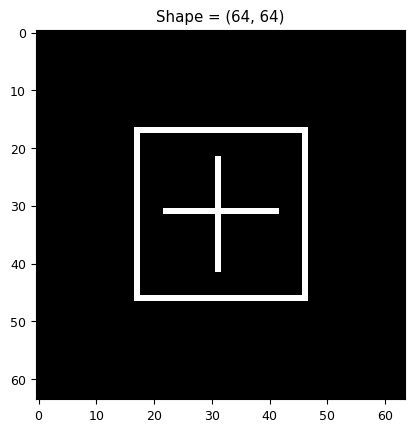

In [320]:
nimg = img = create_img()
showimg(normalize_img(nimg))

## <div class="alert alert-info"> Arithmetic operations

- Note: one of the images can be replaced by a scalar: img1 op img2, img1 op scalar

In [ ]:
alpha, beta, gamma = 6, 7, 3
mga = cv2.add(img1, imgf) #min(I1 + I2, 255) saturated addition if uint8
imga = cv2.addWeighted(img1, alpha, imgf, beta, gamma)#  min(αI1 + βI2 + γ, 255), i.e. image blending
imga = cv2.subtract(img1, imgf) # max(I1 − I2, 0), i.e. saturated subtraction if uint8
imga = cv2.absdiff(img1, imgf)# |I1 − I2|, i.e. absolute difference

## <div class="alert alert-danger"> Logical operations

In [ ]:
Logical operations
inot = cv2.bitwise_not(i) #Inverts every bit in I (e.g. mask inversion)
iand = cv2.bitwise_and(i1, i2) #Logical and between I1 and I2 (e.g. mask image)
ior = cv2.bitwise_or(i1, i2) #Logical or between I1 and I2 (e.g. merge 2 masks)
ixor = cv2.bitwise_xor(i1, i2) #Exclusive or between I1 and I2

## <div class="alert alert-warning"> Statistics

In [291]:
mB, mG, mR, mA = cv2.mean(img11) #Average of each channel (i.e. BGRA)
ms, sds = cv2.meanStdDev(img11) #Mean and SDev p/channel (3 or 4 rows each)
h1 = cv2.calcHist([imgf], [2], None, [256], [0,256]) #Histogram of channel c, no mask, 256 bins (0-255)
h2 = cv2.calcHist([imgf], [0,1], None, [256,256], [0,256, 0,256]) #2D histogram using channels 0 and 1, with
 #“resolution” 256 in each dimension

## <div class="alert alert-success"> Filtering

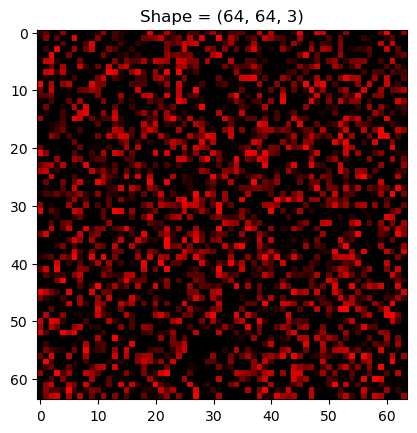

In [311]:
# Add Gaussian Noise
img_gn = create_img()
img_gn = cv2.randn(img_gn ,(0),(99))+img_gn

showimg(img_gn)

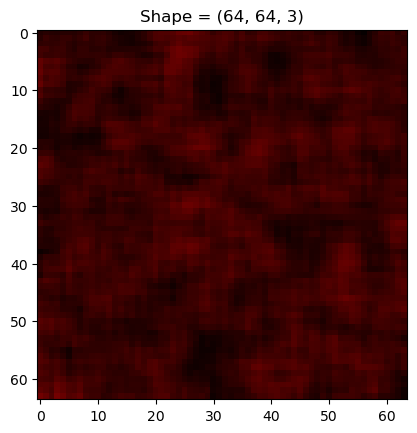

In [313]:
# Box Bluring , Filters I with 5 × 5 box filter (i.e. average filter)
imgb = cv2.blur(img_gn, (5, 5))

showimg(imgb)

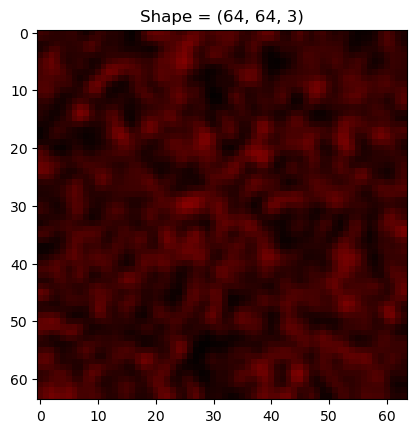

In [315]:
# Filters Img with 5 × 5 Gaussian; auto σs; (I is float)
imggb = cv2.GaussianBlur(img_gn, (5,5), sigmaX=0, sigmaY=0) 
showimg(imggb)

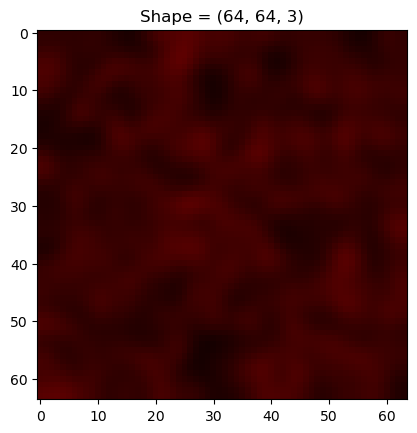

In [317]:
# Blurs, auto kernel dimension
imggb2 = cv2.GaussianBlur(img_gn, None, sigmaX=2, sigmaY=2) 
showimg(imggb2)

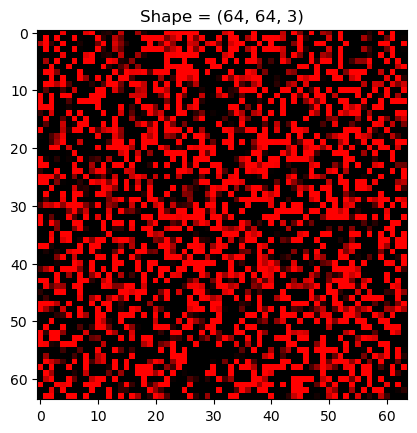

In [319]:
# Filters with 2D kernel using cross-correlation
img2df = cv2.filter2D(img_gn, -1, 3) 
showimg(img2df)

In [337]:
# 1D Gaussian kernel with length 5 (auto StDev)
kx = cv2.getGaussianKernel(5, -1) 
ky = cv2.getGaussianKernel(5, -1) 

# kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
# ky = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
kx, ky

(array([[0.0625],
        [0.25  ],
        [0.375 ],
        [0.25  ],
        [0.0625]]),
 array([[0.0625],
        [0.25  ],
        [0.375 ],
        [0.25  ],
        [0.0625]]))

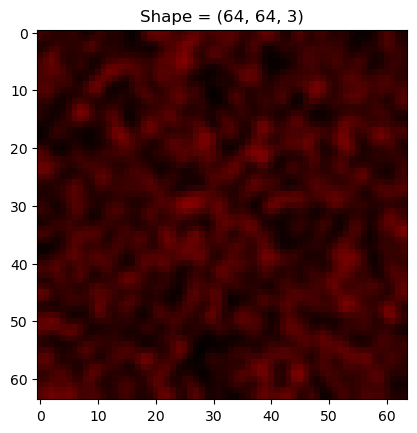

In [339]:
#Filter using separable kernel (same output type)
imgsf = cv2.sepFilter2D(img_gn, -1, kx, ky) 
showimg(imgsf)

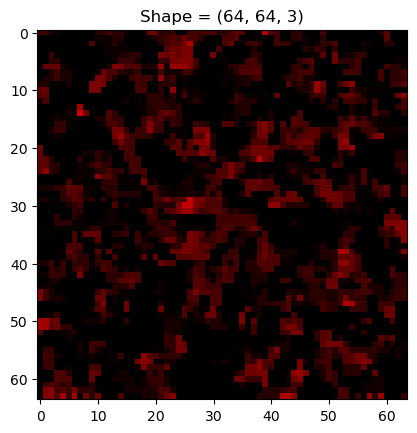

In [343]:
# Median filter with size=3 (size ≥ 3)
imgmb = cv2.medianBlur(img_gn, 3) 
showimg(imgmb)

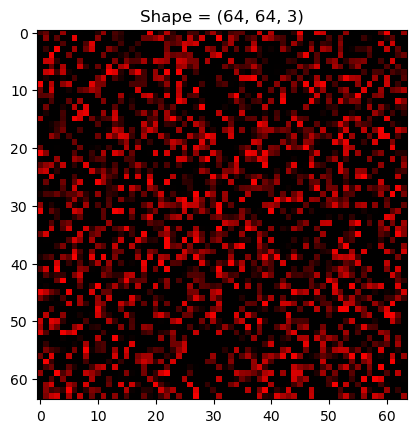

In [345]:
# Bilateral filter with σr = 10, σs = 50, auto size
imgbf = cv2.bilateralFilter(img_gn, -1, 10, 50) 
showimg(imgbf)

- Borders: All filtering operations have parameter borderType which can be set to:
    - BORDER_CONSTANT Pads with constant border (requires additional parameter value)
    - BORDER_REPLICATE Replicates the first/last row and column onto the padding
    - BORDER_REFLECT Reflects the image borders onto the padding
    - BORDER_REFLECT_101 Same as previous, but doesn’t include the pixel at the border (the default)
    - BORDER_WRAP Wraps around the image borders to build the padding
    - Borders can also be added with custom widths:

            img = cv2.copyMakeBorder(img, 2, 2, 3, 1, borderType=BORDER_WRAP) #Widths: top, bottom, left, right

## <div class="alert alert-info"> Differential operators

**Introduction**

- In a convolutional network, the layers near to the input are used to extract spatial features. This behavior is inspired by what happens in human visual system when we are called to recognize an object. The first information that our brain decodes is the **shape**, the **color**, the presence of **textures**, the **orientation** of the light and the **edges**.
- We extract general information from the world which, as we process it, will allow us to obtain more and more abstract information to recognize the object.
- The focus here is on ***edge detection*** or rather the ***calculus of the image first derivative***, taking a look at the differences between the continuous and discrete worlds. Finally, the convolution process through two derivation operators will be analyzed and their advantages and disadvantages will be highlighted

**Notions of continuous differential calculus**
- Mathematically, the derivative expresses the rate of local variability of a function with respect to a direction of development.
- For a function $f: R \rightarrow R$ with only one direction of development x, and let $x_i$ be a point in its domain.
  - The information we want to obtain is whether the signal f, at the working point $x_i$ (local variability), undergoes a variation (increases or decreases) or remains constant. The idea could be to study the around of the working point or better:
    - (i) evaluate f in $x_i$
    - (ii) evaluate f in $x_i$ plus an infinitesimal quantity $\epsilon$
    - (iii) calculate a difference between the two.
  - This is what happens in the calculation of the first derivative which we can formalize with Formula delineated below.
  $$f^{'}(x_i) = lim_{\epsilon \rightarrow 0}\frac{f(x_i +\epsilon)-f(x_i)}{\epsilon}$$
- A function f is ***derivable*** at a working point $x_i$ if the limit of the incremental ratio of the function exists and is finite, as the epsilon increment of the independent variable tends to zero.

**Multidimensional functions**
- Multidimensional functions assume particular importance for the following discussion.
- Let $f: R^n \rightarrow R$ be a scalar field defined on n directions of development, the calculation of the derivative is done by considering the partial first derivatives, or rather the derivatives with respect to each of the n directions.
- The latter constitute the **gradient** $\nabla(f): R^n \rightarrow R^3$, a vector field that associates to each n-dimensional point of the scalar field of a vector. The gradient provides three important pieces of information for each point.
- The first, the modulus, expresses the amount of variation of the function f around the working point (Gradient Magnitude),
  $$|\nabla f(x,y)| = \sqrt{\frac{\partial f(x, y)}{\partial x} \bar{x} + \frac{\partial f(x, y)}{\partial y} \bar{y}}$$
- The second is the versus of growth of the function at the calculation point, and
  $$\frac{\partial f(x, y)}{\partial x} \bar{x}$$ and $$\frac{\partial f(x, y)}{\partial y} \bar{y}$$
- The third is the direction, orthogonal to the contour lines of the scalar field (Gradient Orientation).
  $$\theta = tan^{-1}(\frac{\frac{\partial f(x,y)}{\partial x}}{\frac{\partial f(x,y)}{\partial y}})$$

**Edge**
- A rapid change in image intensity in a small region (infitesmal region, $\epsilon$)
- Interesting Things Happen Around the edge
- First Derivate: Local Extremas
- Second Partial Derivative: Zero-crossing Points in the Laplacian of an image
- Gradient Operator ($\nabla$)
  - First Order Derivative
  - Derivative of a continuous function represents the amount of change in the function
  - Local Extremas indicate edges, and their heights show strength of the edge.
  - Rate of Local variability of a continuous function
- In the presence of noise, $n_{\sigma}$, in signal, $f$
  - $Edge = \nabla(n_{\sigma}\times f)$ or $Edge = \nabla(n_{\sigma})\times f$
  - $Edge = \nabla^2(n_{\sigma}\times f)$ or $Edge = \nabla^2(n_{\sigma})\times f$ 

**Edge detection**
- Let $I[x,y]$ be our image in two directions of development, x (width) and y (height) respectively. We define an edge as a region of $I[x,y]$ in which there is a change of color intensity.
- Representation of the three types of edge we can find in image analysis 

#### <font color='green'>STEP</font>

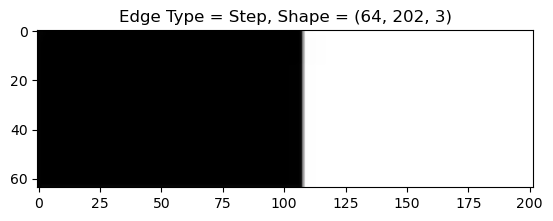

In [372]:
step = cv2.imread(r'/home/alem/Documents/AlemNotes/step.png',-1)
showimg(step, title='Edge Type = Step')

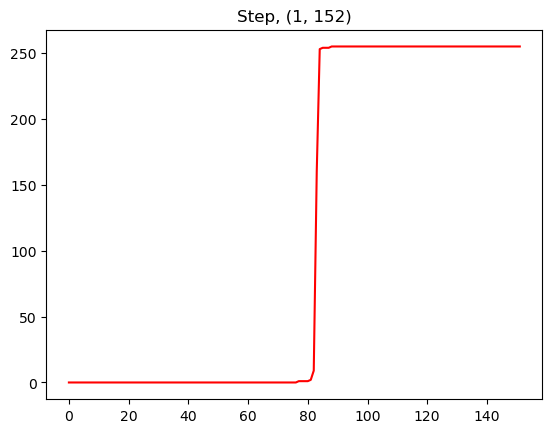

In [384]:
h, w =step.shape[:2]
plt.plot(step[:,:,0][h//2-1:h//2, 25:w-25].flatten(), color='red')
plt.title(f'Step, {step[:,:,0][h//2-1:h//2, 25:w-25].shape}')
plt.show()

#### <font color='green'>RAMP</font>

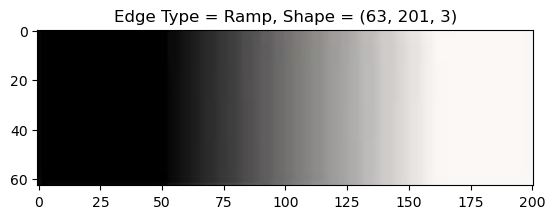

In [390]:
ramp = cv2.imread(r'/home/alem/Documents/AlemNotes/ramp.png',-1)
showimg(ramp, title='Edge Type = Ramp')

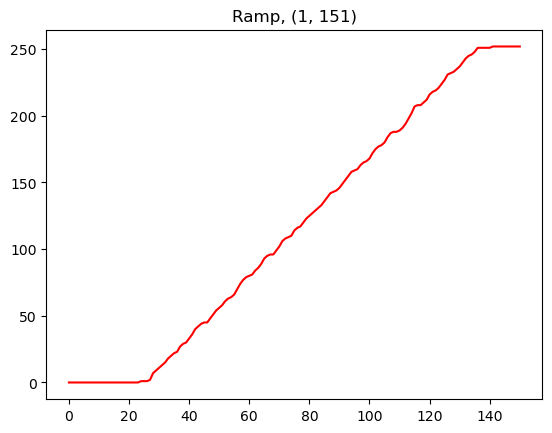

In [392]:
h, w =ramp.shape[:2]
plt.plot(ramp[:,:,0][h//2-1:h//2, 25:w-25].flatten(), color='red')
plt.title(f'Ramp, {ramp[:,:,0][h//2-1:h//2, 25:w-25].shape}')
plt.show()

#### <font color='green'>ROOF-TOP</font>

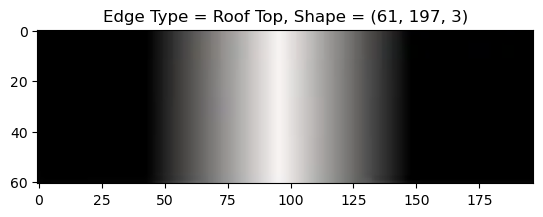

In [394]:
rtop = cv2.imread(r'/home/alem/Documents/AlemNotes/rooftop.png',-1)
showimg(rtop, title='Edge Type = Roof Top')

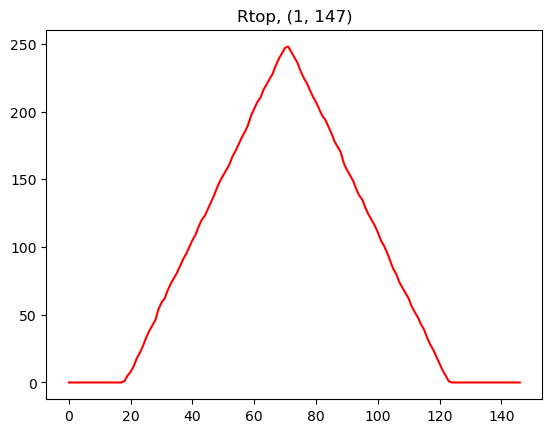

In [397]:
h, w =rtop.shape[:2]
plt.plot(rtop[:,:,0][h//2-1:h//2, 25:w-25].flatten(), color='red')
plt.title(f'Rtop, {rtop[:,:,0][h//2-1:h//2, 25:w-25].shape}')
plt.show()

#### <font color='green'>ROOF-TOP-INVERTED</font>

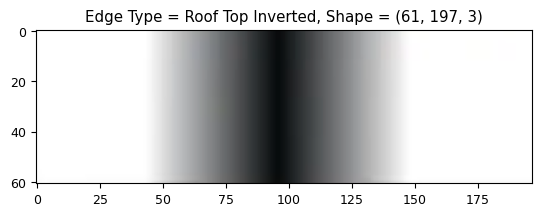

In [297]:
rtopi = cv2.imread(r'/home/alem/Documents/AlemNotes/rooftop.png',-1)
rtopi = ~rtopi
showimg(rtopi, title='Edge Type = Roof Top Inverted')

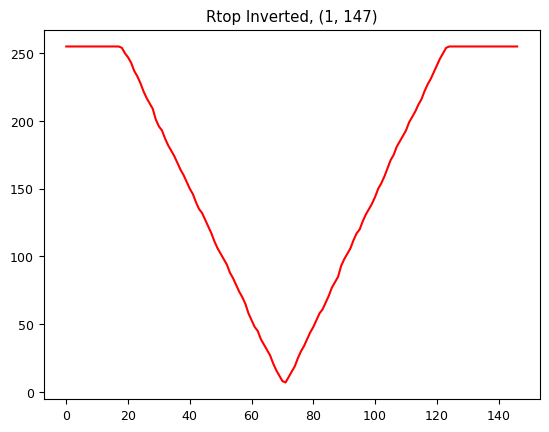

In [299]:
h, w =rtopi.shape[:2]
plt.plot(rtopi[:,:,0][h//2-1:h//2, 25:w-25].flatten(), color='red')
plt.title(f'Rtop Inverted, {rtopi[:,:,0][h//2-1:h//2, 25:w-25].shape}')
plt.show()

- Edge detection aims to highlight this variation by calculating the gradient of the image. As we know, the gradient is made up of partial first derivatives. Their formalization, as presented above, is valid in the continuous world. An image, on the other hand, is a discrete multidimensional signal.

**Discrete Partial Derivative**

- The feature of discrete multidimensionality involves an approximation of the **continuous partial first derivative by a finite difference**, where the **epsilon** increment does not tend to cancel **(ϵ → 0)** but takes on a finite value.
- In the case of our discrete signal $I[x,y]$ the value of the increment is equal to **one pixel**. The smallest quantity for which, given the pixel $[x_m,y_n]$, we can move around it to assess the local rate of variability is precisely the pixel.
- Formalizing, we can distinguish three types of **finite differences**:
  - (a) Forward
  - (b) Backward
  - (c) Central

**Convolution**:
- One of the most well-known operations, when we talk about images, is **convolution**. Given a matrix K (Kernel), the convolution makes K slide by a certain stride along with the height and width of the image I, performing a weighted sum between the values of the Kernel and the overlapping region of the image.
- This technique, through an appropriate Kernel transformation, is what we use to apply **finite differences** on the images by calculating the partial first derivative in the two directions of development. A summary and formalization of what has just been said is presented in what follows.
- In the field of computer vision and in particular for edge detection, **Central or also called symmetric differentiation** is used.

- Tabl: Formalization of the three types of finite differences, Forward, Backward and Central in the development directions x and y and the two-dimensional working point $[x_m,y_n]$. To each is associated the corresponding representation through Kernel of dimension 1x3 for the development direction x and 3x1 for the development direction y. [Src: Internet]

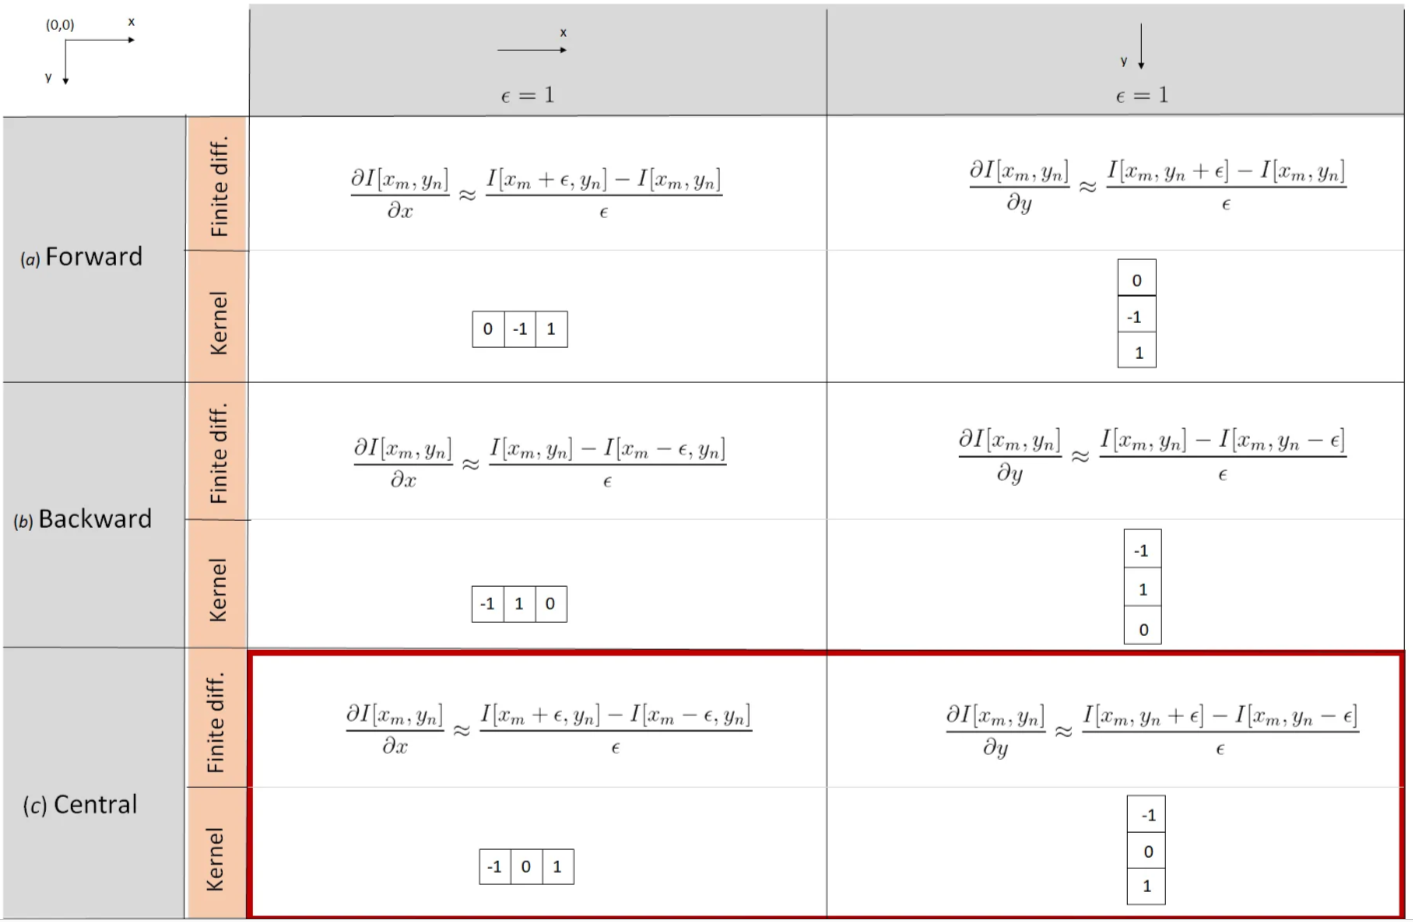

In [416]:
dimg(filename=r'/home/alem/Documents/AlemNotes/cnvtbl.png') 

**Discrete gradient**
- The convolution produces a new image, called a features map (F), having the same dimensions in terms of height and width as ***I (stride = 1 and padding = ‘same’)*** and in which specific features of I are emphasized. As an example, if we calculate the convolution between I[x,y] and Kx (Kernel of derivation with respect to x), the result will be a new image Fx in which the vertical edges will have a non-zero intensity value to the detriment of the horizontal edges. In particular, we can say that:
  - ***the intensity value of the pixel $F_x[x_m,y_n]$ corresponds to the value of the partial first derivative at the point $I[x_m,y_n]$.***
 
- The same analysis can be carried out by considering Ky (derivation kernel with respect to y).

  $|G[x_m, y_n]| = \sqrt(F_x[x_m, y_n]^2 + F_y[x_m, y_m]^2)$

  $\theta = tan^{-}(\frac{F_y[x_m, y_n]}{F_x[x_m, y_n]})$

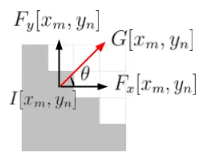

In [423]:
dimg(filename=r'/home/alem/Documents/AlemNotes/edges_est.png') 

- Once the values of the partial derivatives have been obtained, we can calculate the gradient G. The latter will associate to each pixel $I[x_m,y_n]$ the information on the modulus, which will indicate the quantity or magnitude of variation of the image around $[x_m,y_n]$ and on the direction, which will express the direction of growth of the color intensity around the pixel of interest. Fig.3 shows a geometric representation of what has been said. Since we are in the discrete world, a more correct representation can be found as ensues

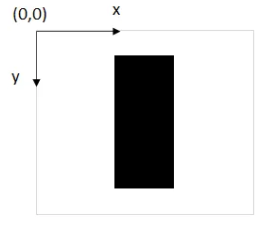

In [426]:
dimg(filename=r'/home/alem/Documents/AlemNotes/example.png') 

- (A) Input Image With Left, Right, Top, and Bottom Edges. That is, it shows the image $I[x,y]$ with two edges in the respective directions (x or y) of development

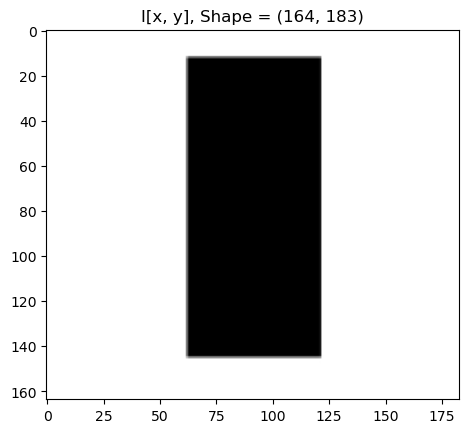

In [449]:
ce = cv2.imread('/home/alem/Documents/AlemNotes/ce.png', -1)
I = ce.copy() # I[x, y]
# Convert I to Grayscale
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

showimg(I, title='I[x, y]')

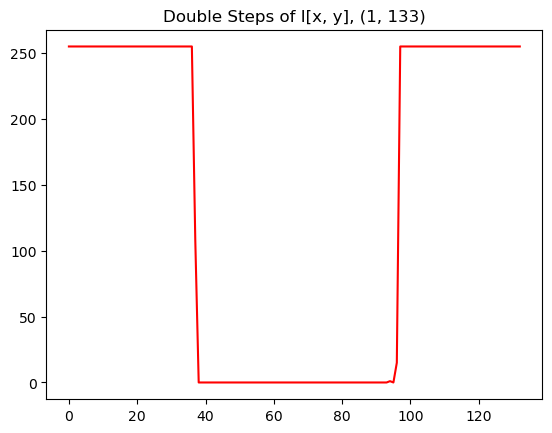

In [483]:
h, w = I.shape[:2]
plt.plot(I[h//2-1:h//2, 25:w-25].flatten(), color='red')
plt.title(f'Double Steps of I[x, y], {I[h//2-1:h//2, 25:w-25].shape}')
plt.show()

- (B) The plot below shows $F_x = I[x, y]*K_x$, or rather, the derivative of (A) with respect to x. Note how the vertical edges are highlighted with respect to the horizontal ones.

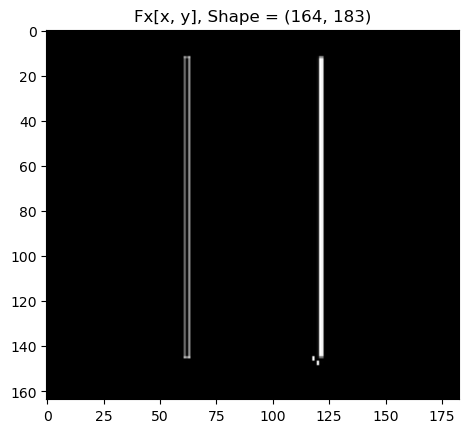

array([[ 1,  0, -1]])

In [456]:
#-Derivative x
Kx = -1*np.array([[-1,0,1]])
Fx = ndimage.convolve(I, Kx)
showimg(Fx, title='Fx[x, y]')
Kx

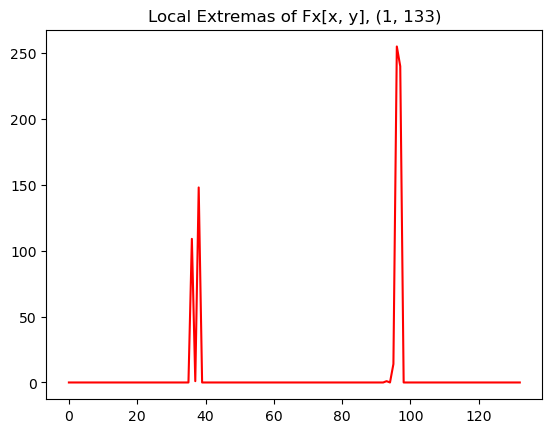

In [485]:
h, w = Fx.shape[:2]
plt.plot(Fx[h//2-1:h//2, 25:w-25].flatten(), color='red')
plt.title(f'Local Extremas of Fx[x, y], {Fx[h//2-1:h//2, 25:w-25].shape}')
plt.show()

- (C) The plot below is that of $F_y = I[x, y]*K_y$, or rather, it is the representation of the derivative with respect to y. The behavior, in this case, is opposite to what we saw in (B).

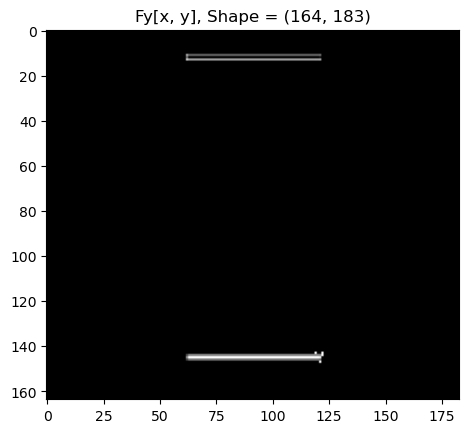

array([[ 1],
       [ 0],
       [-1]])

In [458]:
#-Derivative y
Ky = -1*np.array([[-1],[0],[1]])
Fy = ndimage.convolve(I, Ky)
showimg(Fy, title='Fy[x, y]')
Ky

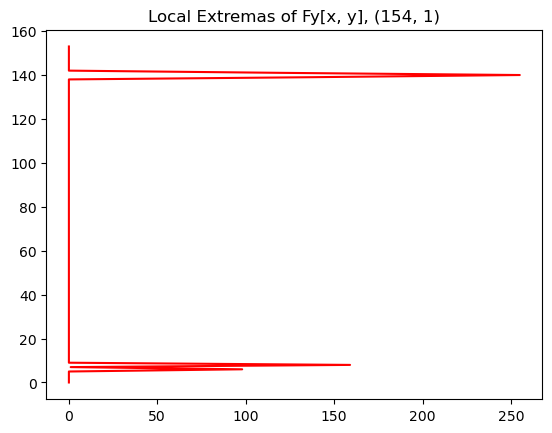

In [495]:
h, w = Fy.shape[:2]
xx = Fy[5:h-5, w//2-1:w//2].flatten()
yy = list(range(len(xx)))
plt.plot(xx, yy, color='red')
plt.title(f'Local Extremas of Fy[x, y], {Fy[5:h-5, w//2-1:w//2].shape}')
plt.show()

- (D) Mahnitude

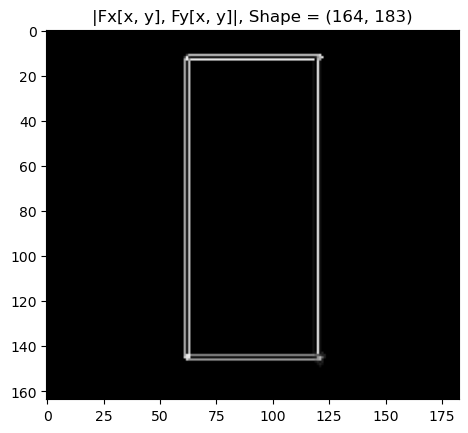

In [477]:
#--Magnitute
mag = np.sqrt(Fx**2 + Fy**2) # G
showimg(mag, title='|Fx[x, y], Fy[x, y]|')

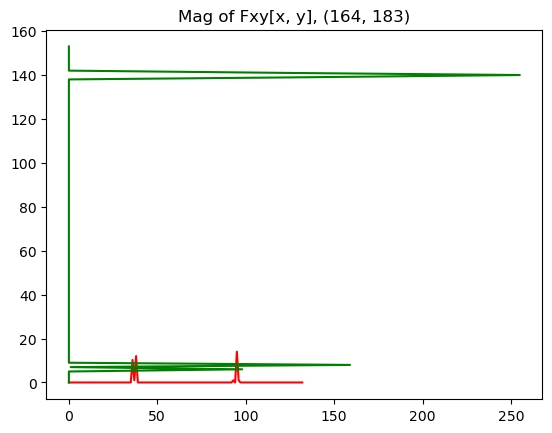

In [499]:
h, w = mag.shape[:2]
plt.plot(mag[h//2-1:h//2, 25:w-25].flatten(), color='red')
xx = Fy[5:h-5, w//2-1:w//2].flatten()
yy = list(range(len(xx)))
plt.plot(xx, yy, color='green')

plt.title(f'Mag of Fxy[x, y], {mag.shape}')
plt.show()

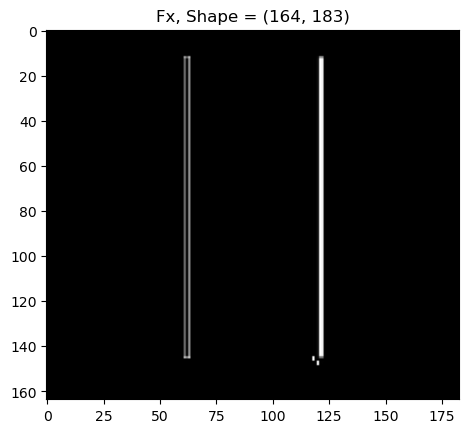

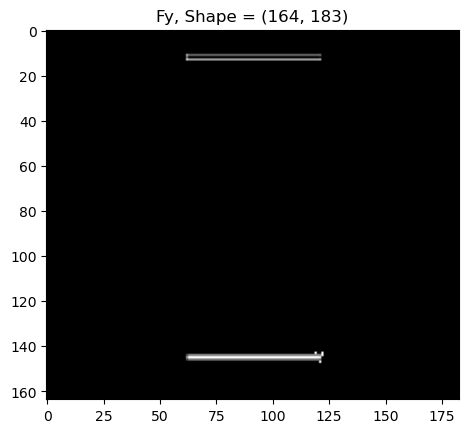

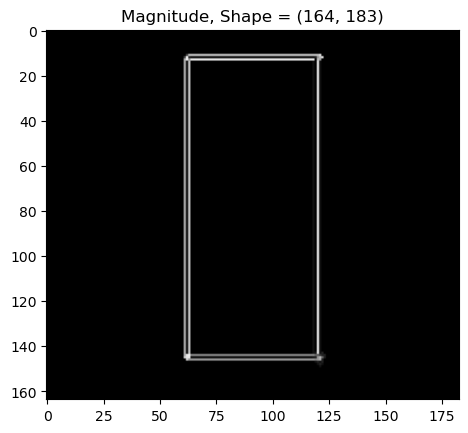

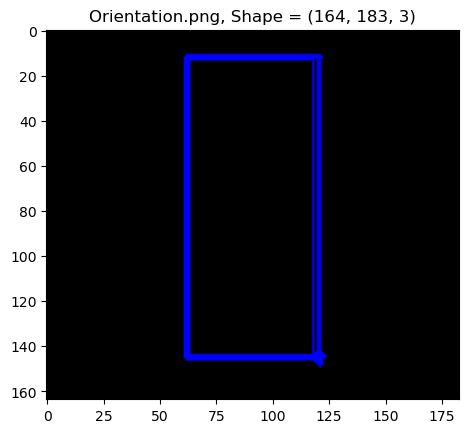

In [474]:
# Get Input Image
I = cv2.imread('/home/alem/Documents/AlemNotes/ce.png', -1)

# Convert I to Grayscale
I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

#-Derivative x
Kx = -1*np.array([[-1,0,1]])
Fx = ndimage.convolve(I, Kx)

#-Derivative y
Ky = -1*np.array([[-1],[0],[1]])
Fy = ndimage.convolve(I, Ky)

#-Gradient 

#--Magnitute
magnitude = np.sqrt(Fx**2 + Fy**2) # G

#--Orientation
phase = cv2.phase(Fx.astype('float32'), Fy.astype('float32'), angleInDegrees=True) #theta
mask_phase = np.zeros((I.shape[0], I.shape[1],3), dtype=np.uint8)

mask_phase[(magnitude != 0) & (phase >= 0) & (phase <= 90)] = np.array([0, 0, 255]) #red
mask_phase[(magnitude != 0) &  (phase > 90) & (phase <= 180)] = np.array([0, 255, 255]) #yellow
mask_phase[(magnitude != 0) & (phase > 180) & (phase <= 270)] = np.array([0, 255, 0]) #green
mask_phase[(magnitude != 0) & (phase > 270) & (phase <= 360)] = np.array([255, 0, 0])  #blue

#-Display Images
showimg(np.abs(Fx), "Fx")
showimg(np.abs(Fy), "Fy")

showimg(magnitude, "Magnitude")
showimg(mask_phase, "Orientation.png")


In [508]:
def create_sobel_gradient(
                            img: np.ndarray,
                            flag: bool = False
                         ) -> np.ndarray:
    # Denoise Image 
    # img = ndimage.median_filter(img, size=3, cval=0, mode='constant')
    # img = ndimage.gaussian_filter(img, 8)

    if flag:
        return img

    # Apply Sobel Filter  Along X-Axis
    sx = ndimage.sobel(img, axis=0, mode='constant')

    # Apply Sobel Filter  Along Y-Axis
    sy = ndimage.sobel(img, axis=1, mode='constant')

    # Calculate the magnitude of gradient
    sobxy = np.hypot(sx, sy)

    return sobxy

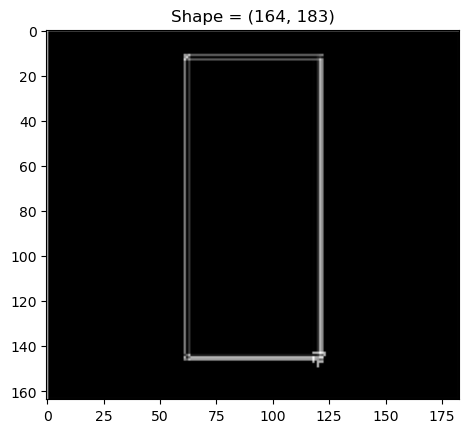

In [510]:
sxy = create_sobel_gradient(I)
showimg(sxy)

**CV2 Differential operators Functions**
- Using Scharr Method
  - $cv2.Scharr(img, ddepth, xorder, yorder)$

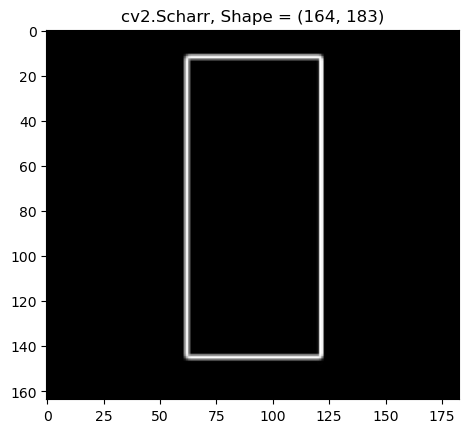

In [522]:
sx = cv2.Scharr(I, cv2.CV_64F, 1, 0)
sy = cv2.Scharr(I, cv2.CV_64F, 0, 1)
sxy = np.hypot(sx, sy)

showimg(sxy, title='cv2.Scharr')

- Using Sobel Gradient Method
  - $cv2.Sobel(img, ddepth, xorder, yorder, ksize)$
     - $I_x = Sobel(I, CV\_32F, 1, 0),\ Sobel\ in\ the\ x-direction:\ I_x =\frac{\partial I}{\partial x}$
     - $I_y = Sobel(I, CV\_32F, 0, 1),\ Sobel\ in\ the\ y-direction:\ I_y =\frac{\partial I}{\partial y}$
     - $mag = |I_x, I_y| = magnitude(I_x, I_y) = ∥\nabla I∥;\ I_x,\ I_y\ must\ be\ float\ (for\ conversion,\ see\ np.astype())$

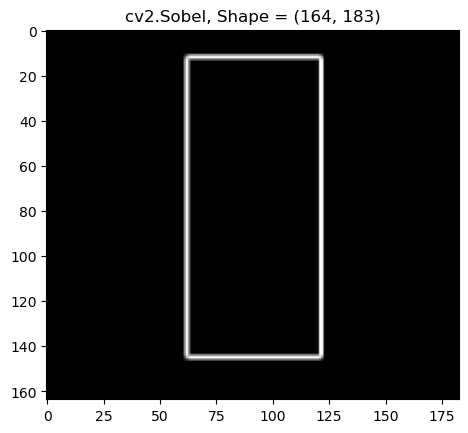

In [529]:
sx = cv2.Sobel(I, cv2.CV_64F, 1, 0, 3)
sy = cv2.Sobel(I, cv2.CV_64F, 0, 1, 3)

sxy = np.hypot(sx, sy)

showimg(sxy, title='cv2.Sobel')

- Using Spatial Gradient
    - $I_x, I_y = cv2.spatialGradient(I, 3)\ The\ gradient:\ \nabla I\ (using\ 3 \times 3\ Sobel):\ needs uint8 image$
    - $m,\ d\ =\ cv2.cartToPolar(I_x, I_y)\ ∥\nabla I∥; θ \in [0, 2\pi];\ angleInDegrees=False;\ needs\ float32 I_x,\ and I_y$

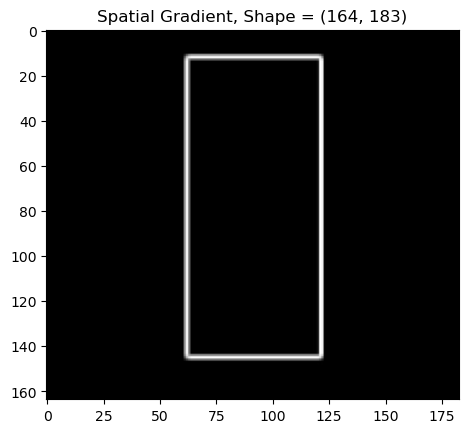

In [549]:
Ix, Iy = cv2.spatialGradient(I, 3)
showimg(np.hypot(Ix, Iy), title='Spatial Gradient')

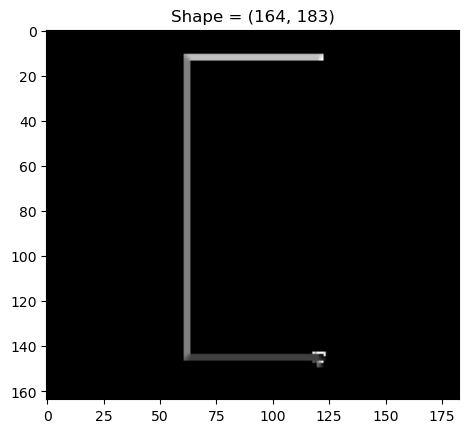

In [571]:
m, d = cv2.cartToPolar(Ix.astype('float32'), Iy.astype('float32'), angleInDegrees=360)
showimg(d)

- Using Laplacian Method
    - cv2.Laplacian(img, ddepth)
        - $l = Laplacian(I, CV\_32F, ksize=5)\ \nabla^2 I,\ Laplacian\ with\ kernel\ size\ of\ 5$

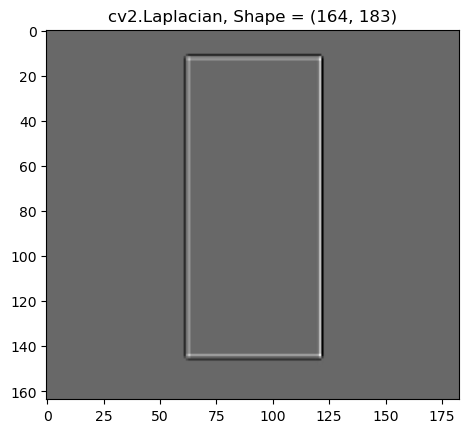

In [536]:
lpn = cv2.Laplacian(I, cv2.CV_64F)
showimg(lpn, title='cv2.Laplacian')

**Differential Operators Filters**
- To be Central/Symmetric Differentiation, they must be of odd size

In [600]:
roberts_x = np.array([[0, 1], [-1, 0]])
roberts_y = np.rot90(roberts_x,1)
roberts_x, roberts_y

(array([[ 0,  1],
        [-1,  0]]),
 array([[ 1,  0],
        [ 0, -1]]))

In [604]:
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.rot90(prewitt_x,1)
prewitt_x, prewitt_y

(array([[-1,  0,  1],
        [-1,  0,  1],
        [-1,  0,  1]]),
 array([[ 1,  1,  1],
        [ 0,  0,  0],
        [-1, -1, -1]]))

In [606]:
small_sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
small_sobel_y = np.rot90(small_sobel_x,1)
small_sobel_x, small_sobel_y

(array([[-1,  0,  1],
        [-2,  0,  2],
        [-1,  0,  1]]),
 array([[ 1,  2,  1],
        [ 0,  0,  0],
        [-1, -2, -1]]))

In [612]:
sob3x3 = np.matmul(np.array([ 1, 2, 1 ]).T, np.array([1, 0, -1]))
sob3x3

0

In [616]:
large_sobel_x = np.array([[1,	4,	6,	4,	1], 
                          [2,	8,	12,	8,	2], 
                          [0,	0,	0,	0,	0],
                          [-2,	-8,	-12, -8,-2 ],
                          [-1, -4, -6, -4, -1]
                         ])
large_sobel_y = np.rot90(large_sobel_x,1)
large_sobel_x, large_sobel_y

(array([[  1,   4,   6,   4,   1],
        [  2,   8,  12,   8,   2],
        [  0,   0,   0,   0,   0],
        [ -2,  -8, -12,  -8,  -2],
        [ -1,  -4,  -6,  -4,  -1]]),
 array([[  1,   2,   0,  -2,  -1],
        [  4,   8,   0,  -8,  -4],
        [  6,  12,   0, -12,  -6],
        [  4,   8,   0,  -8,  -4],
        [  1,   2,   0,  -2,  -1]]))

**Summary of Differential Operators**:

In [166]:
oimg = create_img(H=64, W=64)

- **NDIMAGE.SOBEL**

True

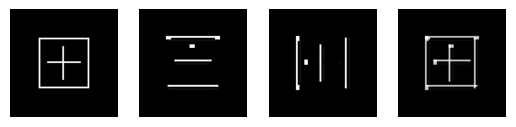

In [324]:
sx = ndimage.sobel(oimg, axis=0, mode='constant')
sy = ndimage.sobel(oimg, axis=1, mode='constant')
sxy = np.hypot(sx, sy).astype('float32')
showImgsHorizontally([oimg, normalize_img(sx), normalize_img(sy), normalize_img(sxy)])

- **CV2.SOBEL**

True

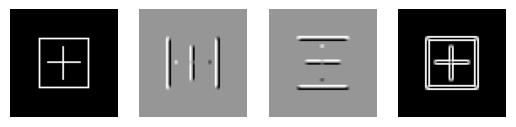

In [326]:
sx = cv2.Sobel(oimg, cv2.CV_64F, 1, 0, 3)
sy = cv2.Sobel(oimg, cv2.CV_64F, 0, 1, 3)
sxy = np.hypot(sx, sy)
showImgsHorizontally([oimg, normalize_img(sx), normalize_img(sy), normalize_img(sxy)])

- **cv2.Scharr**

True

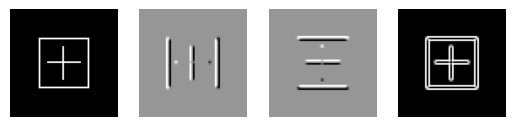

In [329]:
sx = cv2.Scharr(oimg, cv2.CV_64F, 1, 0)
sy = cv2.Scharr(oimg, cv2.CV_64F, 0, 1)
sxy = np.hypot(sx, sy)
showImgsHorizontally([oimg, normalize_img(sx), normalize_img(sy), normalize_img(sxy)])

- **cv2.Laplacian**

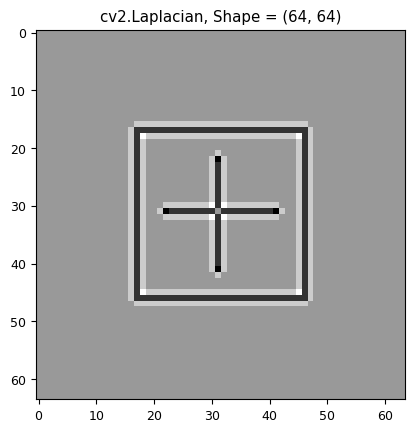

In [336]:
lpn = cv2.Laplacian(oimg, cv2.CV_64F)
showimg(normalize_img(lpn), title='cv2.Laplacian')

## <div class="alert alert-danger"> Geometric Transforms

In [13]:
imgr = create_img(H=64, W=64)

True

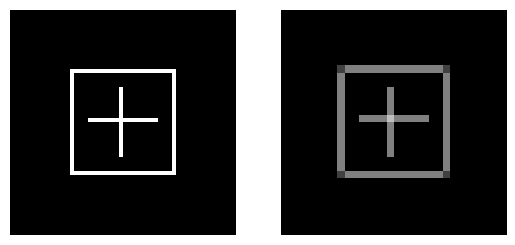

In [27]:
# Resizes image to width×height
hr, wr = imgr.shape[:2]
imgr2 = cv2.resize(imgr, (wr//2, hr//2)) 
showImgsHorizontally([imgr, imgr2])

True

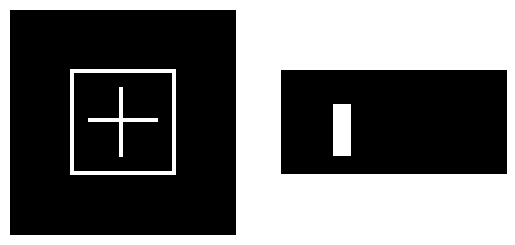

In [31]:
# Scales image to 20% width and 10% height
ir = cv2.resize(imgr, None, fx=0.2, fy=0.1) 
showImgsHorizontally([imgr, ir])

True

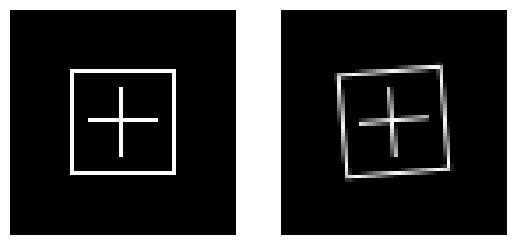

In [43]:
imgr = create_img(H=64, W=64)
h, w = img.shape[:2]
yc, xc = h//2, w//2
# Returns 2 × 3 rotation matrix M, arbitrary (xc, yc)
M = cv2.getRotationMatrix2D((xc, yc), 5, scale=1.0)
# Affne transform matrix M from 3 correspondences
#M = getAffineTransform(pts1,pts2) 
# Applies Affne transform M to I, output size=(cols, rows)
ir = cv2.warpAffine(imgr, M, (w,h)) 
showImgsHorizontally([imgr, ir])

True

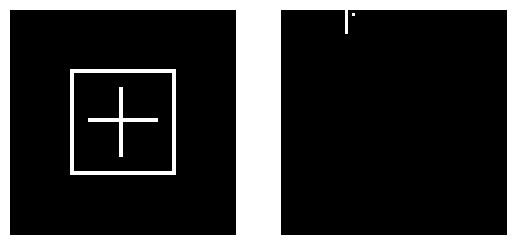

In [47]:
# Define the source points
src = np.float32([[5, 5], [20, 5], [5, 20]])

# Define the destination points
dst = np.float32([[10, 30], [20, 5], [10, 25]])

# Calculate the transformation matrix
M = cv2.getAffineTransform(src, dst)

# Apply the transformation to an image
transformed_img = cv2.warpAffine(imgr, M, (imgr.shape[1], imgr.shape[0]))
showImgsHorizontally([imgr, transformed_img])

True

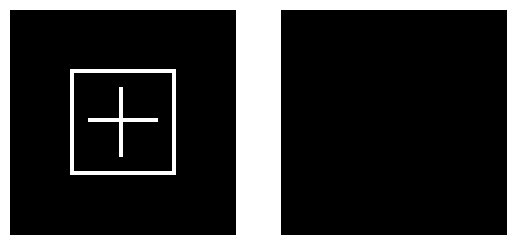

In [55]:
# Perspective transform matrix M from 4 correspondences
# Define the source points
pts1 = np.float32([[56, 65], [368, 52], [28, 387], [389, 390]])
# Define the destination points
pts2 = np.float32([[0, 0], [300, 0], [0, 300], [300, 300]])
M = cv2.getPerspectiveTransform(pts1, pts2) 

# Applies perspective transform M to image I
i = cv2.warpPerspective(imgr, M, (wr, hr)) 
showImgsHorizontally([imgr, i])

True

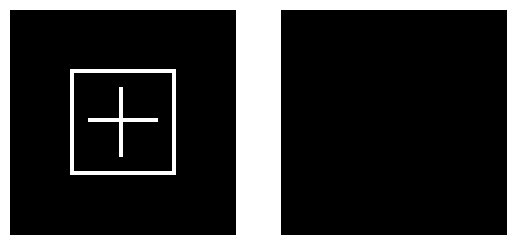

In [57]:
# Persp transf mx M from all ≫ 4 corresps (Least squares)
M, s = cv2.findHomography(pts1, pts2) 

# Applies perspective transform M to image I
i = cv2.warpPerspective(imgr, M, (wr, hr)) 
showImgsHorizontally([imgr, i])


True

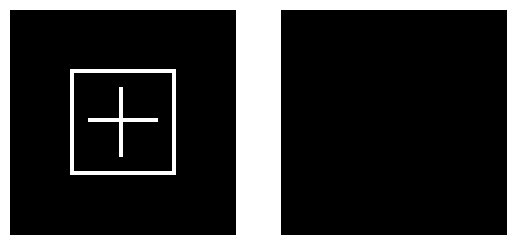

In [59]:

# Persp transf mx M from best ≫ 4 corresps (RANSAC)
M, s = cv2.findHomography(pts1, pts2, cv2.RANSAC) 
# Applies perspective transform M to image I
i = cv2.warpPerspective(imgr, M, (wr, hr)) 
showImgsHorizontally([imgr, i])

## <div class="alert alert-warning"> Interpolation methods

- resize, warpAffine and warpPerspective use bilinear interpolation by default. It can be changed by
parameter interpolation for resize, and flags for the others:

          cv2.INTER_NEAREST = 0,
          cv2.INTER_LINEAR = 1,# Bilinear interpolation: Default
          cv2.INTER_CUBIC = 2, # Bicubic interpolation
          cv2.INTER_AREA = 3,
          cv2.INTER_LANCZOS4 = 4,
          cv2.INTER_LINEAR_EXACT = 5,
          cv2.INTER_NEAREST_EXACT = 6,
          cv2.INTER_MAX = 7,
          cv2.WARP_FILL_OUTLIERS = 8,
          cv2.WARP_INVERSE_MAP = 16
- If you are enlarging the image, you should prefer to use INTER_LINEAR or INTER_CUBIC interpolation. If you are shrinking the image, you should prefer to use INTER_AREA interpolation.
- Cubic interpolation is computationally more complex, and hence slower than linear interpolation. However, the quality of the resulting image will be higher.

True

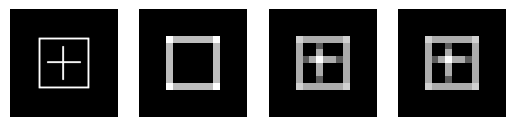

In [194]:
# Simplest, fastest (or interpolation=INTER_NEAREST)
imgr = create_img(H=64, W=64)[:,:,0]
ic = cv2.resize(imgr, (16, 16), interpolation=cv2.INTER_CUBIC)
ia = cv2.resize(imgr, (16, 16), interpolation=cv2.INTER_AREA)
rd = block_reduce(imgr, block_size=(4, 4), func=np.mean)
showImgsHorizontally([imgr, ic, ia, rd])

## <div class="alert alert-success"> Segmentation

- Thresholding Concept, for $T=Threshold,\ and\ f(x,y)\ =\ 2d-image$

$$g(x, y)=\begin{equation}
\left\{ 
  \begin{aligned}
    1\,\ if\ f(x,y)> T\\
    0\,\ if\ f(x,y)\le T
  \end{aligned}
  \right.
\end{equation}
$$

- One Threshold: One threshold for whole image
  $$g(x, y)=\begin{equation}
\left\{ 
  \begin{aligned}
    1\,\ if\ f(x,y)> T\\
    0\,\ if\ f(x,y)\le T
  \end{aligned}
  \right.
\end{equation}
$$
- Multiple Thresholds: Image is clustered into many groups
$$g(x, y)=\begin{equation}
\left\{ 
  \begin{aligned}
    0\,\ if\ f(x,y) < T1\\
    1\,\ if\ T1\le f(x,y)< T2\\
    2\,\ if\ T2\le f(x,y)<T3\\
    3\,\ if\ f(x,y)\ge T3
  \end{aligned}
  \right.
\end{equation}
$$

**Global Thresholding**: One Th for whole Image (or Two CLasses)

True

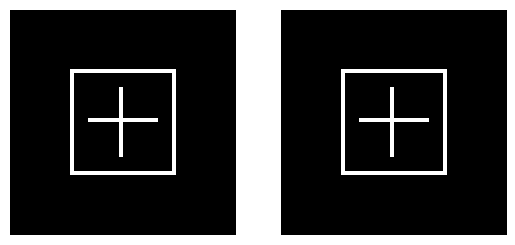

In [104]:
# Manually thresholds image I given threshold level th
th=200
it = create_img(H=64, W=64)
_, tg = cv2.threshold(it, th, 255, cv2.THRESH_BINARY)
showImgsHorizontally([it, tg])

**Otsu Thresholding**

0.0

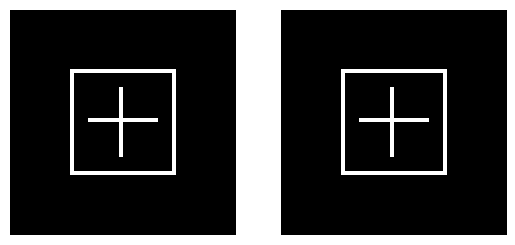

In [112]:
# Returns thresh level and thresholded image using Otsu
t, i_t = cv2.threshold(it[:, :,0], 0, 255, cv2.THRESH_OTSU) 
showImgsHorizontally([it, i_t])
t

**Adaptive Thresholding**

True

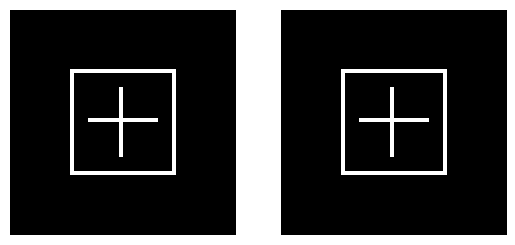

In [121]:
# Adaptive mean-c with block size b and constant c
i_t = cv2.adaptiveThreshold(it[:,:, 0], 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 91, -7) 
showImgsHorizontally([it, i_t])

- Back-projects histogram h onto the image i_hsv using only hue and saturation; no scaling (i.e. 1)
- Use the cv2.calcBackProject() function to calculate the backprojection of the image. This function takes the following parameters:
    - images: The image (or list of images) in which to search.
    - channels: The index of the channel (e.g., 0 for Hue) used to calculate the histogram.
    - hist: The histogram of the target region.
    - ranges: The range of values in the histogram bins.
- scale: A scaling factor for the backprojection values. 


True

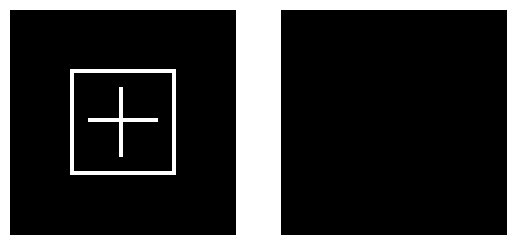

In [124]:
# Load the image
image = create_img(H=64, W=64)

# Define the region of interest (ROI)
roi = image[16:48, 16:48]

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)

# Calculate the histogram of the ROI
roi_hist = cv2.calcHist([hsv_roi], [0, 1], None, [180, 256], [0, 180, 0, 256])

# Normalize the histogram
cv2.normalize(roi_hist, roi_hist, 0, 255, cv2.NORM_MINMAX)

# Calculate the backprojection
backprojection = cv2.calcBackProject([hsv_image], [0, 1], roi_hist, [0, 180, 0, 256], 1)
showImgsHorizontally([image, backprojection])

In [ ]:
# Returns the labels la and centers ct of K clusters, best compactness cp out of 10; 1 feat/column
cp, la, ct = cv2.kmeans(feats, K, None, crit, 10, cv2.KMEANS_RANDOM_CENTERS) 

- **threshold_otsu**

In [129]:
import matplotlib.pyplot as plt
from skimage import data
from skimage.filters import threshold_otsu

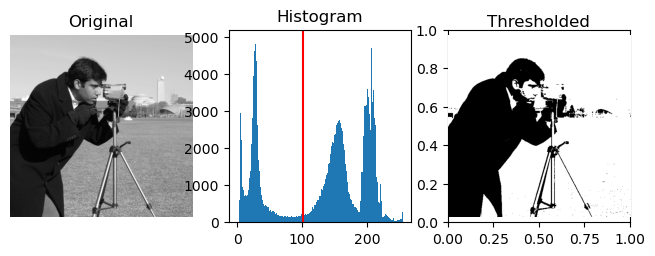

In [131]:
image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(8, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

- **Multiotsu**

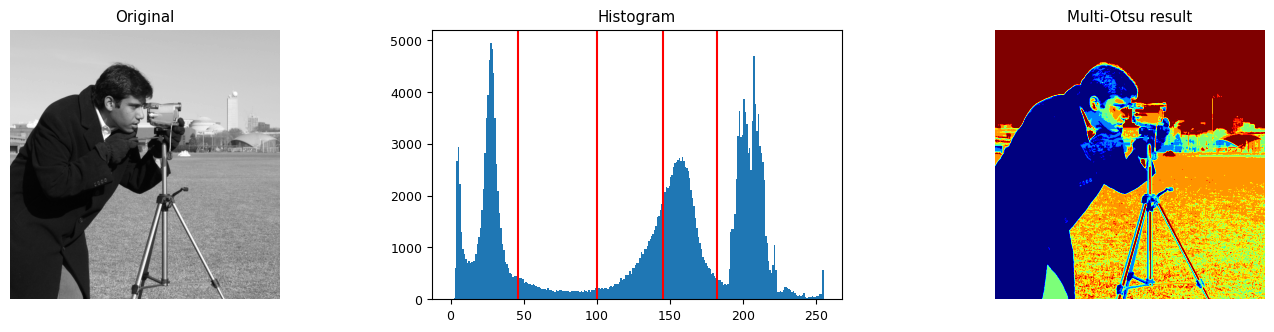

In [140]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.filters import threshold_multiotsu

# Setting the font size for all plots.
matplotlib.rcParams['font.size'] = 9

# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image, classes=5)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

## <div class="alert alert-info"> Features

In [340]:
ci = create_img()

**Canny**
- Reduce Noise using Gaussian Smoothing.
- Compute image gradient using Sobel filter.
- Apply Non-Max Suppression or NMS to just jeep the local maxima
- Finally, apply Hysteresis thresholding which that 2 threshold values T_upper and T_lower which is used in the Canny() function.

- Syntax: cv2.Canny(image, T_lower, T_upper, aperture_size, L2Gradient)
    - Where: 

            NMSImage: Input image to which Canny filter will be applied
            T_lower: Lower threshold value in Hysteresis Thresholding
            T_upper: Upper threshold value in Hysteresis Thresholding
            aperture_size: Aperture size of the Sobel filter.
            L2Gradient: Boolean parameter used for more precision in calculating Edge Gradient.

True

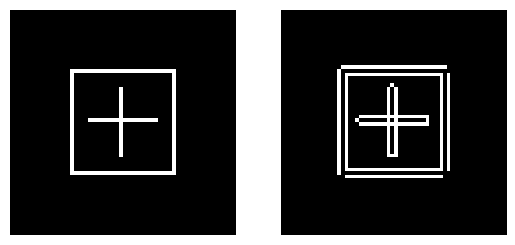

In [206]:
# Returns the Canny edges (e is binary)
e = cv2.Canny(ci, 50, 150)
showImgsHorizontally([ci, e])

**HoughLines**
- Returns all (ρ, θ) ≥ 150 votes, Bin res: ρ = 1 pix, θ = 1 deg

In [227]:
# Returns all (ρ, θ) ≥ 150 votes, Bin res: ρ = 1 pix, θ = 1 deg
l1 = cv2.HoughLines(e, 1, np.pi/180, 150)

# Probabilistic Hough, min length=100, max gap=20
l2 = cv2.HoughLinesP(e, 1, np.pi/180, 150, None, 100, 20)
#showImgsHorizontally([ci, e, l1, l2])

# Returns all (xc, yc, r) with at least 18 votes, bin resolution=1, 
# param2=18, param1 is the th of Canny, and the centers must be at least
c = cv2.HoughCircles(ci[:, :, 0], cv2.HOUGH_GRADIENT, 1, minDist=50, param1=200, 
                     param2=18, minRadius=20, maxRadius=60)

**Harris**
- CornerHarris
  - Harris corners’ Rs per pixel, window=3, Sobel=5, α = 0.04
 
- Syntax: cv2.cornerHarris(src, dest, blockSize, kSize, freeParameter, borderType)
- Parameters: 
    - src – Input Image (Single-channel, 8-bit or floating-point) 
    - dest – Image to store the Harris detector responses. Size is same as source image 
    - blockSize – Neighborhood size ( for each pixel value blockSize * blockSize neighbourhood is considered ) 
    - ksize – Aperture parameter for the Sobel() operator 
    - freeParameter – Harris detector free parameter 
    - borderType – Pixel extrapolation method ( the extrapolation mode used returns the coordinate of the pixel corresponding to the specified extrapolated pixel )

In [446]:
ci = create_img()[:,:,0]
operatedImage = np.float32(ci) 
ci.dtype, operatedImage.dtype, operatedImage.shape
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07) 

True

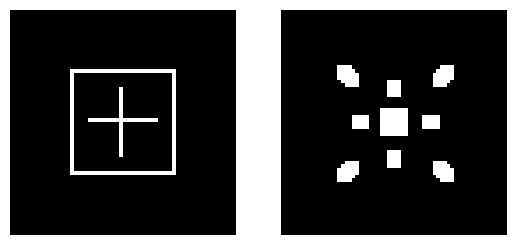

In [448]:
ci = create_img()[:,:,0]  
operatedImage = np.float32(ci) 
mask = np.zeros(ci.shape, np.uint8)
# apply the cv2.cornerHarris method 
# to detect the corners with appropriate 
# values as input parameters 
dest = cv2.cornerHarris(operatedImage, 2, 5, 0.07) 
  
# Results are marked through the dilated corners 
dest = cv2.dilate(dest, None) 
  
# Reverting back to the original image, 
# with optimal threshold value 
mask[dest > 0.01 * dest.max()]=[255]

showImgsHorizontally([ci, mask])

**FastFeatureDetector_create()**
- Instantiates the Star feature detector
- Detects keypoints on grayscale image I
- Draws keypoints k on color image I

True

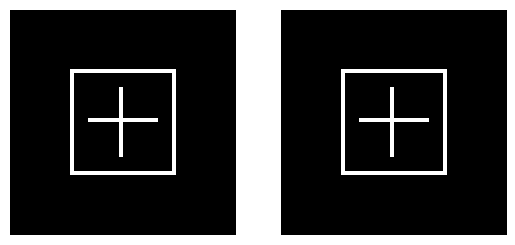

In [258]:
f = cv2.FastFeatureDetector_create()
k = f.detect(ci, None)
i_k = cv2.drawKeypoints(ci, k, None) 
showImgsHorizontally([ci, i_k])

**BRIEF descriptor**
- Instantiates a BRIEF descriptor
- Computes the descriptors of keypoints k over I
- pip install opencv-contrib-python

            pip3 uninstall opencv-contrib-python
            pip3 uninstall opencv-python

In [ ]:
d = cv2.xfeatures2d.BriefDescriptorExtractor_create() 
k, ds = d.compute(ci, k) 
showImgsHorizontally([ci, k])

**AKAZE detector/descriptor**
- Instantiates the AKAZE detector/descriptor
- Detect keypoints and compute descriptors
- Draw keypoints on the image

- cv2.AKAZE_create() is a function in OpenCV (Open Source Computer Vision Library) that creates an AKAZE feature detector and descriptor extractor object.
- Here's a breakdown of its functionality:
  - AKAZE: AKAZE stands for Accelerated-KAZE. It's a feature detection and description algorithm that is known for its robustness to scale and rotation changes in images.
  - Feature Detection: AKAZE detects keypoints, which are distinctive points in an image that can be used for various tasks like image matching, object recognition, and tracking.
  - Descriptor Extraction: Once keypoints are detected, AKAZE computes descriptors for them. These descriptors are numerical vectors that represent the appearance of the keypoint's neighborhood. Descriptors can be used to compare keypoints and determine whether they correspond to the same feature in different images.

(64, 64, 3)

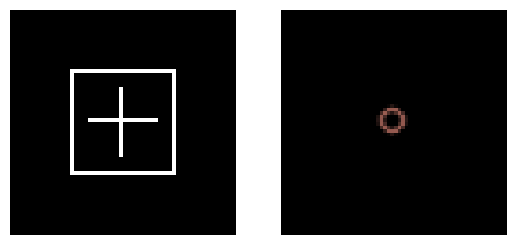

In [295]:
# Instantiates the AKAZE detector/descriptor
akaze= cv2.AKAZE_create() 

# Detect keypoints and compute descriptors
keypoints, descriptors = akaze.detectAndCompute(ci, None)

# Draw keypoints on the image
mask = np.zeros((64, 64,3), np.uint8)
img_with_keypoints = cv2.drawKeypoints(mask, keypoints, None)

showImgsHorizontally([ci, img_with_keypoints])
img_with_keypoints.shape

**BFMatcher**
- Instantiates a brute-force matcher, with x-checking, and Hamming distance

In [ ]:
# Instantiates a brute-force matcher,
m = cv2.BFMatcher.create(cv2.NORM_HAMMING, crossCheck=True) 

# Matches the left and right descriptors
ms = m.match(ds_l, ds_r)

# Draws matches from the left keypoints k_l on left image Il to right Ir, using matches ms
i_m = drawMatches(i_l, k_l, i_r, k_r, ms, None)

## <div class="alert alert-warning"> Detection

In [342]:
di = create_img()

**Template Matching**
- Template matching is a technique for finding areas of an image that are similar to a patch (template). A patch is a small image with certain features. The goal of template matching is to find the patch/template in an image. To find it, the user has to give two input images: Source Image (S) – The image to find the template in, and Template Image (T) – The image that is to be found in the source image.  
- Matches template T to image I (normalized X-correl)

          ccs = matchTemplate(img, template, TM_CCORR_NORMED)

In [352]:
ccs = cv2.matchTemplate(di, di, cv2.TM_CCORR_NORMED)
ccs

array([[1.]], dtype=float32)

In [357]:
# Min, max values and respective coordinates in ccs
m, M, m_l, M_l = cv2.minMaxLoc(ccs)
m, M, m_l, M_l

(1.0, 1.0, (0, 0), (0, 0))

- **CascadeClassifier**

In [ ]:
# Creates an instance of an “empty” cascade classifier
c = CascadeClassifier()

# Loads a pre-trained model from file; r is True/False
r = c.load("file.xml") 

# Returns 1 tuple (x, y, w, h) per detected object
objs = c.detectMultiScale(i) 

## <div class="alert alert-danger"> Motion and Tracking

In [388]:
mt1 = create_img()
mt = mt1[:,:,0]

- **Good Features**
    - Using goodFeaturesToTrack() function –


        Syntax : cv2.goodFeaturesToTrack(gray_img, maxc, Q, minD)       
        
        Parameters :
        
        gray_img – Grayscale image with integral values
        
        maxc – Maximum number of corners we want(give negative value to get all the corners)
        
        Q – Quality level parameter(preferred value=0.01)
        
        maxD – Maximum distance(preferred value=10)

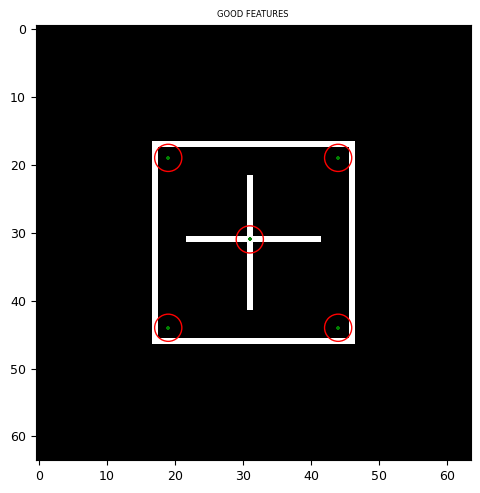

True

In [444]:
# Returns 100 Shi-Tomasi corners with, at least, 0.5 quality, and 10 pixels away from each other
pts = cv2.goodFeaturesToTrack(mt, 100, 0.5, 10) 
corners = np.int0(pts) 
corners = [tuple(corners[i][0]) for i in range(len(corners))]
  
# plot red color circles on all corners 
plot_shapes(mt, corners, shape='circle', title='GOOD FEATURES', radius=2)

- **OPtical Flow**
    - New positions of pts from estimated optical flow between I0 and I1; st[i] is 1 if flow for point i was found, or 0 otherwise.

In [ ]:
pts1, st, e = cv2.calcOpticalFlowPyrLK(i0, i1, pts0, None) 

- **TrackerCSRT**

In [ ]:
# Instantiates the CSRT tracker
t = cv2.TrackerCSRT_create() 

# Initializes tracker with frame and bounding box
r = t.init(f, bbox) 

# Returns new bounding box, given next frame
r, bbox = t.update(f) 

## <div class="alert alert-info"> Drawing On Images

NB: For color to work, image must be colored or RGB
- Parameters
    - (x0, y0) Origin/Start/Top left corner (note that it’s not (row,column))
    - (x1, y1) End/Bottom right corner
    - (b, g, r) Line color (uint8)
    - t Line thickness (fills, if negative)

- Line

In [478]:
doi = create_img()
doi1 = doi[:,:,0]

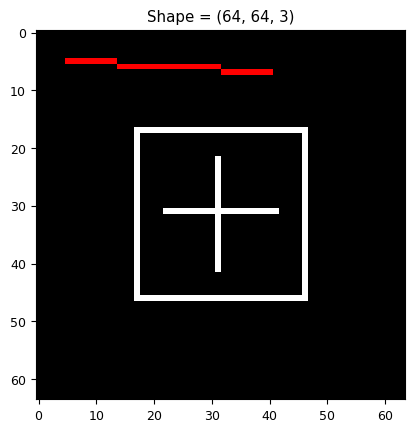

In [480]:
doil = doi.copy()
t=1 # thickness, cv2.filled
(x0, y0) = 5, 5
(x1, y1) = 40, 7
(b, g, r) = (255, 0, 0)
cv2.line(doil,(x0, y0),(x1, y1), (b, g, r), t)
showimg(doil)

- Rectangle

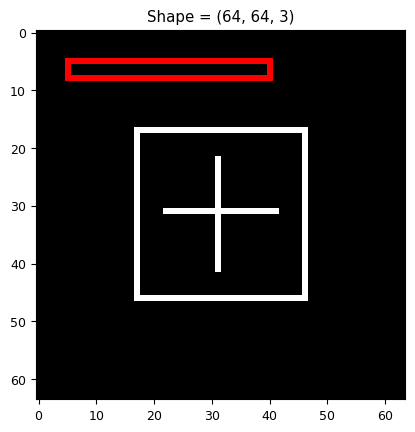

In [483]:
doir = doi.copy()
t=1 # thickness, cv2.filled
(x0, y0) = 5, 5
(x1, y1) = 40, 8
(b, g, r) = (255, 0, 0)
cv2.rectangle(doir,(x0, y0),(x1, y1), (b, g, r), t)
showimg(doir)

- Circle

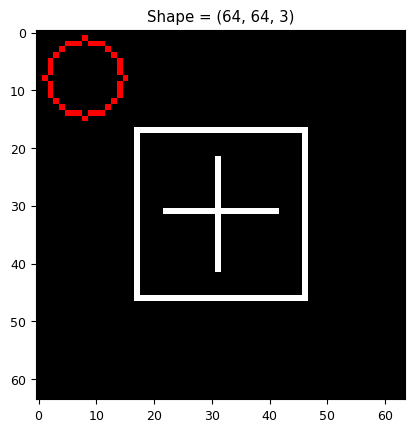

In [490]:
doic = doi.copy()
t=1 # thickness, cv2.filled
radius = 7
(xc, yc) = 8, 8
(b, g, r) = (255, 0, 0)
cv2.circle(doic,(xc, yc), radius, (b, g, r), t)
showimg(doic)

- Polylines

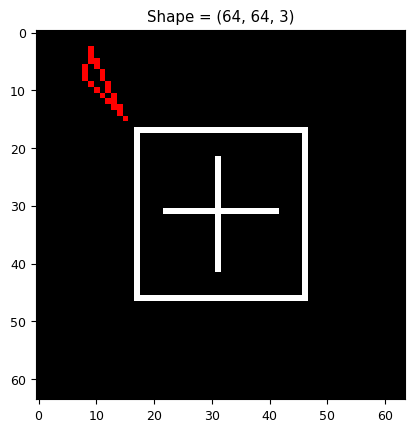

In [501]:
doip = doi.copy()
t=1 # thickness, cv2.filled
radius = 7
pts = np.array([(8.0, 8.0), (15.0,15.0), (9.0, 3.0)], np.int32)
(b, g, r) = (255, 0, 0)
cv2.polylines(doip,[pts], True, (b, g, r), t) # close = True
showimg(doip)

- Add Text
  - Writes “Text” at (x, y), font size/font-scale=1, thickness=2
  - cv2.putText(i, "Text", (x,y), cv2.FONT_HERSHEY_SIMPLEX,1, (r,g,b), 2, cv2.LINE_AA)

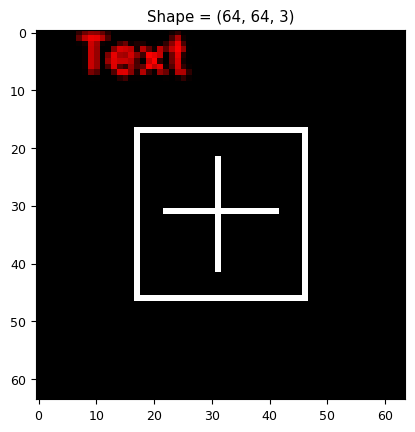

In [516]:
pti =create_img()
(r,g,b) = (255, 0, 0)
cv2.putText(pti, "Text", (7, 7), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (r,g,b), 1, cv2.LINE_AA)
showimg(pti)

In [532]:
def plt_on_img(
                    img: np.ndarray, 
                    spt: tuple = None,
                    ept: tuple = None,
                    xcyc: tuple = (0, 0),
                    radius: int = 2,
                    pts: list[tuple] = None, # polylines
                    color: tuple = (255, 0, 0),
                    thickness: int =1,
                    flag: str = 'all',
                    add_text: bool = False,
                    text: str = '',
                    ftype: int = cv2.FONT_HERSHEY_SIMPLEX,
                    fscale: float = 1,
                    fnt: int = cv2.LINE_AA
                 ) -> np.ndarray:
    """_summary_: Plots Various Shapes On Images Using CV2 
                  Created By Alem Fitwi

    Args:
        img(np.ndarray): 2D Input Image
        spt(tuple): Start Point
        ept(tuple): End Point
        pts(list[tuple]): List of tuples
        color(tuple): color values
        thickness(int): plot line thickness

    Returns:
        np.ndarray: returns image with plots
                   plt_on_img(img, spt, ept, pts, thickness)
    
    """
    # Check Image dimensions
    if img.ndim <=2:
        img = cv2.cvtColor(img, cv2.GRAY2BGR)
        
    if 'line' in flag or 'all' in flag:
        cv2.line(img, spt, ept, color, thickness)
    elif 'rect' in flag or 'all' in flag:
        cv2.rectangle(img, spt, ept, color, thickness)
    elif 'circle' in flag or 'all' in flag:
        cv2.circle(img, xcyc, radius, color, thickness)
    elif 'poly' in flag or 'all' in flag:
        cv2.polylines(img, [np.array(pts, np.int32)], 
                      True, color, thickness)
    else:
        pass

    if add_text:
        cv2.putText(img, text, spt, ftype, fscale, 
                    color, thickness, fnt)


    return img


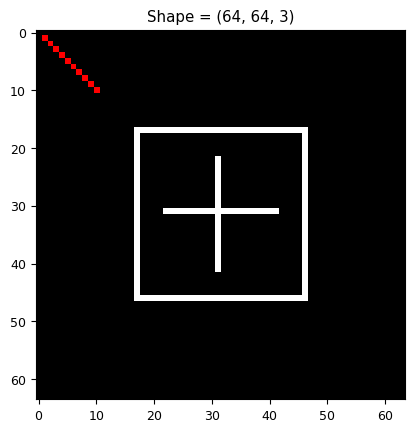

In [530]:
showimg(plt_on_img(create_img(), spt=(1, 1), ept=(10, 10)))

## <div class="alert alert-success"> Calibration

- 2D coords of detected corners; i is gray; r is the status; (n_x, n_y) is size of calib target

In [10]:
def expand_to_4x4(arr):
    """Expands each element of a 1D array into a 4x4 array."""
    return np.repeat(np.repeat(arr[:, np.newaxis, np.newaxis], 4, axis=1), 4, axis=2)

# Example usage:
original_array = np.array([1, 2, 3])
result_array = expand_to_4x4(original_array)
result_array.shape

(3, 4, 4)

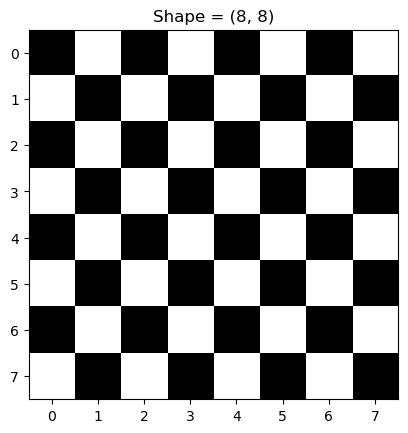

In [12]:
x = np.zeros((8, 8), dtype=np.uint8)
x[1::2, ::2] = 1 
x[::2, 1::2] = 1 
x=x*255
showimg(x)

32 32


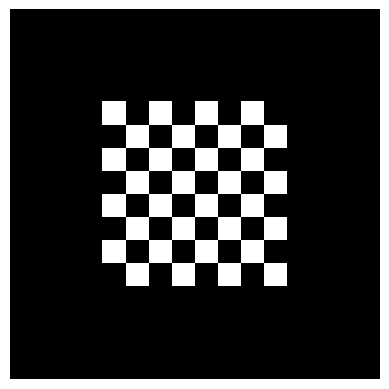

In [22]:
def create_cb_pattern(H, W, csize = (4, 4), cb_num=(8, 8), plt_img=True):
    # Create an nxn checkerboard pattern
    checkerboard = np.zeros(cb_num, np.uint8)
    checkerboard[::2, ::2] = 1
    checkerboard[1::2, 1::2] = 1
    
    # Upscale the checkerboard to csizexcb_num pixels
    checkerboard = np.repeat(
        np.repeat(checkerboard, csize[0], axis=0), 
                   csize[1], axis=1)

    # Overlay CB Pattern Onto Bgd Image
    h, w = checkerboard.shape
    print(h, w)
    if H>=h and W>=w:
        img = np.zeros((H, W), np.uint8)
        img[H//2-h//2:H//2+h-h//2, 
        W//2-w//2:W//2+w-w//2] = checkerboard
    else:
        img = checkerboard.copy()
    
    # Display the checkerboard
    if plt_img:
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.show() 

    return img

cbi = create_cb_pattern(64, 64, csize = (4, 4), cb_num=(8, 8))

In [597]:
r, crns = cv2.findChessboardCorners(checkerboard, (8,8), None)

        crnrs = cornerSubPix(i, crns, (5,5), (-1,-1), crit) Improves coordinates with sub-pixel accuracy
        r, K, D, ExRs, ExTs = calibrateCamera(crns_3D, Calculates intrinsics (inc. distortion coeffs), &
        crns_2D, i.shape[:2], None, None) extrinsics (i.e. 1 R+T per target view); crns_3D
        contains 1 array of 3D corner coords p/target
        view; crns_2D contains the respective arrays of
        2D corner coordinates (i.e. 1 crns p/target view)
        drawChessboardCorners(i, (n_x, n_y), crns, r) Draws corners on I (may be color); r is status
        from corner detection
        u = undistort(i, K, D) Undistorts I using the intrinsics
        s = StereoSGBM_create(minDisparity = 0,
        numDisparities = 32, blockSize = 11) Instantiates Semi-Global Block Matching method
        s = StereoBM_create(32, 11) Instantiates a simpler block matching method
        d = s.compute(i_L, i_R) Computes disparity map (∝−1 depth map)

- **Termination criteria (used in e.g. K-Means, Camera calibration)**

- crit = (TERM_CRITERIA_MAX_ITER, 20, 0) Stops after 20 iterations
- crit = (TERM_CRITERIA_EPS, 0, 1.0) Stop if “movement” is less than 1.0
- crit = (TERM_CRITERIA_MAX_ITER | TERM_CRITERIA_EPS, 20, 1.0) Stops whatever happens first

## <div class="alert alert-warning"> Miscellaneous

- numpy --> np

In [29]:
di = create_img()

In [37]:
np.mean(di), np.average(di), np.var(di), np.std(di)

(9.649658203125, 9.649658203125, 2367.5469383597374, 48.657444840021526)

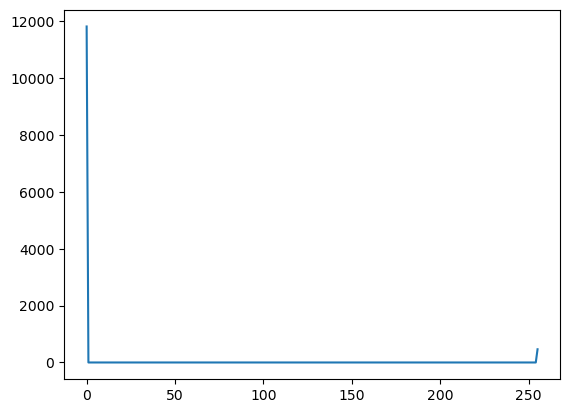

In [48]:
# numpy histogram also returns the bins b
h,b = np.histogram(di.ravel(),256,[0,256])
plt.plot(h)
plt.show()

- numpy’s saturation/clamping function

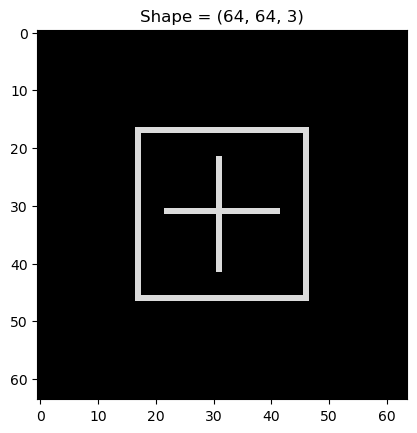

In [53]:
img = np.clip(di*37, 0, 255)
showimg(img)

In [55]:
# Converts the image type to float32 (vs. uint8, float64)
i = di.astype(np.float32)
i.dtype, di.dtype

(dtype('float32'), dtype('uint8'))

In [ ]:
# Solves the least squares problem 1 2 ∥Ax − b∥^2
x, _, _, _ = np.linalg.lstsq(A, b) #Solves the least squares problem 1/2 ∥Ax − b∥^2

In [57]:
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])
A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [59]:
m, c = np.linalg.lstsq(A, y)[0]
m, c

(0.9999999999999997, -0.9499999999999992)

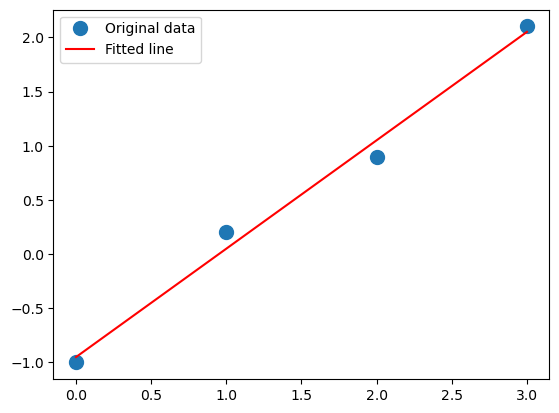

In [61]:
_ = plt.plot(x, y, 'o', label='Original data', markersize=10)
_ = plt.plot(x, m*x + c, 'r', label='Fitted line')
_ = plt.legend()
plt.show()

In [65]:
i = np.hstack((di, di)) #Merges I1 and I2 side-by-side

In [81]:
i = np.vstack((di, di)) #Merges I1 above I2
i = np.fliplr(di) #Flips image left-right
i = np.flipud(di) #Flips image up-down
#vi = np.pad(di, ((1, 1), (3, 3)), 'reflect') #Alternative to copyMakeBorder (also top, bottom, left, right)

idx = np.argmax(di) #Linear index of maximum in I (i.e. index of flattened I)
r, c = np.unravel_index(idx, di[:,:,0].shape) #2D coordinate of the index with respect to shape of i
b = np.any(di > 5) #Returns True if any element in array M is greater than 5
b = np.all(di > 5) #Returns True if all elements in array M are greater than 5
rows, cols = np.where(di[:,:,0] > 5) #Returns indices of the rows and cols where elems in M are >5
coords = list(zip(rows, cols)) #Creates a list with the elements of rows and cols paired
M_inv = np.linalg.inv(di[:,:,0]) #Inverse of M
deg=30
rad = np.deg2rad(deg) #Converts degrees into radians
deg = np.rad2deg(rad)

In [ ]:
# Matplotlib.pyplot (plt.)
plt.imshow(i, cmap="gray", vmin=0, vmax=255) matplotlib’s imshow preventing auto-normalization
plt.quiver(xx, yy, i_x, -i_y, color="green") Plots the gradient direction at positions xx, yy
splt.avefig("name.png") Saves the plot as an image

## <div class="alert alert-danger"> DCT

In [ ]:
I = cv2.imread('/home/alem/Documents/AlemNotes/ce.png', -1)

In [ ]:
create_img(H=64, W=64)

## <div class="alert alert-warning"> FFT

In [ ]:
I = cv2.imread('/home/alem/Documents/AlemNotes/ce.png', -1)

## <div class="alert alert-danger"> Peaks

## <div class="alert alert-warning"> Defects

In [ ]:
I = cv2.imread('/home/alem/Documents/AlemNotes/ce.png', -1)

- Dead Pixel
- Mura
- Stuck Pixels
- White Dots
- Noises

## <div class="alert alert-success"> Useful Functions and CLasses

###  Blob Detector

In [181]:
cfg = {
             'thresholdStep2Max': False,
             'thresholdStep': 10,
             'minDistBetweenBlobs': 1,
             'minThreshold': 127,
             'maxThreshold': 255,
             'filterByArea': True,
             'minArea': 1,
             'maxArea': 10000,
             'filterByColor': True,
             'blobColor': 255,
             'filterByCircularity': True,
             'minCircularity ': 0.5,
             'maxCircularity': 1,
             'filterByConvexity': False,
             'minConvexity': 0.5,
             'maxConvexity': 0.9,
             'filterByInertia': False,
             'minInertiaRatio': 0,
             'maxInertiaRatio': 1,
             'erodeBlobs': True,
             'erodeKernel': (3, 3),
             'erodeIters': 1,
             'plotKeypoints': False,
             'tuple_size': 2
      }
 

In [193]:
def detect_blobs(
                    img: np.ndarray, 
                    cfg: dict = None
                 ) -> list:
    """_summary_: performs Blobs Detection On An Image
                  Created by Alem Fitwi 2021June23@21:54PM EST
    Args:
        img(np.ndarray): 2D Input Image
        cfg(dict): a dict of param settings

    Returns:
        list: returns a list of blob centers
              detect_blobs(img, cfg)
    
    """
    # Change Image To 2D
    if img.ndim>2:
        img=cv2.cvtColor(img, cv2.COLOR2GRAY)

    # Set up the SimpleBlobdetector with default parameters.
    params = cv2.SimpleBlobDetector_Params()

    # Define thresholds
    # Can define thresholdStep. See documentation. 
    params.minThreshold = cfg['minThreshold']#127
    if cfg['thresholdStep2Max']:
        params.thresholdStep = cfg['thresholdStep '] # 10
        params.maxThreshold = cfg['maxThreshold'] # 220

    # Just one threshold for blob detection.
    params.minDistBetweenBlobs = cfg['minDistBetweenBlobs']#1


    # Filter by Area. Extract blobs that have an area 
    # between minArea (inclusive) and maxArea (exclusive).
    params.filterByArea = cfg['filterByArea']#True
    if cfg['filterByArea']:
        params.minArea = cfg['minArea']#50
        params.maxArea = cfg['maxArea']#10000

    # Filter by Color (black=0, white=255)
    params.filterByColor = cfg['filterByColor']#False  
    if cfg['filterByArea']:
        params.blobColor = cfg['blobColor']#0

    # Filter by Circularity: Extracted blobs have circularity 
    # (4∗π∗Areaper/(imeter∗perimeter)) between minCircularity 
    # (inclusive) and maxCircularity (exclusive).
    params.filterByCircularity = cfg['filterByCircularity']#True
    if cfg['filterByCircularity']:
        params.minCircularity = cfg['minCircularity ']#0.5
        params.maxCircularity = cfg['maxCircularity']#1

    # Filter by Convexity, Extracted blobs have convexity 
    # (area / area of blob convex hull) between minConvexity
    # (inclusive) and maxConvexity (exclusive).
    params.filterByConvexity = cfg['filterByConvexity']#True
    if cfg['filterByConvexity']:
        params.minConvexity = cfg['minConvexity']#0.5
        params.maxConvexity = cfg['maxConvexity']#1

    # Filter by InertiaRatio
    #  Extracted blobs have this ratio between minInertiaRatio 
    # (inclusive) and maxInertiaRatio (exclusive).
    params.filterByInertia = cfg['filterByInertia']#False
    if cfg['filterByInertia']:
        params.minInertiaRatio = cfg['minInertiaRatio']#0
        params.maxInertiaRatio = cfg['maxInertiaRatio']#1

    # Erode Image To Isolate Blobs
    if cfg['erodeBlobs']:
        # Creating kernel 
        kernel = np.ones(cfg['erodeKernel'], np.uint8)   
        # Using cv2.erode() method  
        img = cv2.erode(img, kernel, iterations=cfg['erodeIters']) 
        
    showimg(img)
    # Setup the detector with parameters
    detector = cv2.SimpleBlobDetector_create(params)

    # Detect blobs
    keypoints = detector.detect(img)

    # Unravel Keypoints Into List
    if len(keypoints):
        if cfg['plotKeypoints']:
            # Draw blobs
            if img.ndim <=2:
                img = cv2.cvtColor(img, cv2.GRAY2BGR)
            img_with_blobs = cv2.drawKeypoints(img, keypoints, 
                        np.array([]), (0,0,255), 
                        cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
            plt.imshow(img_with_blobs)
            plt.show()
        if cfg['tuple_size'] == 3:
            return [(pt.pt[0], pt.pt[1], pt.size) for pt in keypoints]
        else:
            return [(pt.pt[0], pt.pt[1]) for pt in keypoints]
    else:
        return False

32 32


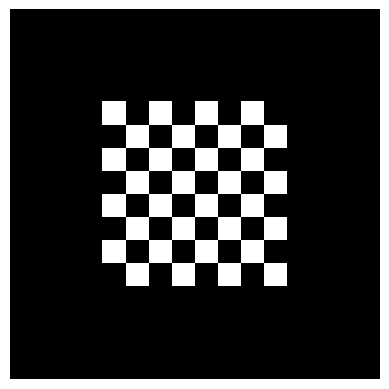

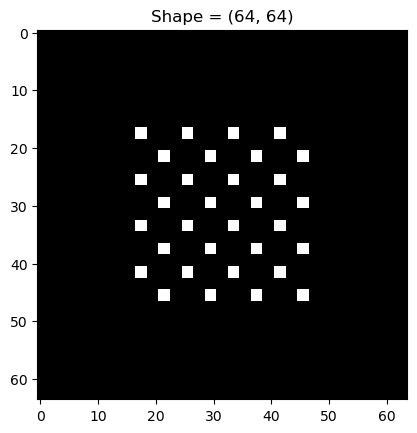

32

In [195]:
cb = create_cb_pattern(64, 64, csize = (4, 4), cb_num=(8, 8))
tuples = detect_blobs(cb*255, cfg) 
len(tuples)

## <div class="alert alert-info"> Plots

In [440]:
def plot_shapes(img, points: list, shape='rect', title='', sq=False, fname='',delay=6,
                c=10, r=5, cmap='gray', recthw=(10,10), fsize=6, radius=10, sp=False):

    # Init Plots
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(c, r))
    fig.canvas.manager.set_window_title(f'Debug: {title}')

    # Display Image
    ax.imshow(img, cmap=cmap)

    # Rectangle
    xs, ys = list(zip(*points))
    ax.scatter(xs, ys, s=5, c='g', marker='+')
    if 'rect' in shape:
        h, w = recthw
        for xy in points:
            x, y = xy
            rect = patches.Rectangle((xc-w, yc-h), w, h, linewidth=1,
                                     edgecolor='r', facecolor='none')
            ax.add_patch(rect)
    if 'circle' in shape:
        for xy in points:
            x, y = xy
            circle = patches.Circle((x, y), radius=radius, linewidth=1,
                    edgecolor='r', facecolor='none')
            ax.add_patch(circle)
        
    ax.set_title(title, fontsize=fsize)
        
    plt.tight_layout()

    if not isinstance(sp, bool):
        plt.savefig(os.path.join(sp, fname),
                    dpi=300, bbox_inches='tight')

    if sq:
        plt.close('all')
    else:
        plt.show(block=False)
        plt.pause(delay)
        plt.close()

    return True



        